In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from statsmodels.stats.diagnostic import het_white, het_breuschpagan, het_goldfeldquandt, linear_reset, acorr_breusch_godfrey
from statsmodels.graphics.gofplots import qqplot
from stargazer.stargazer import Stargazer
import statsmodels.api as sm
from scipy.stats import spearmanr
from sklearn.decomposition import PCA

In [2]:
# żeby było widać wszystkie kolumny w df
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 70)

In [3]:
# wczytywanie zbioru danych
data = pd.read_csv("dane_pogodowe.csv")
# usuwanie redundantnych indeksów
data = data.loc[:,data.columns[1:]]

In [4]:
# sortowanie po numerze stacji, roku, miesiącu, inplace z resetowaniem indeksów
data.sort_values(by = ["station_code", "year", "month"], ignore_index = True, inplace = True)

In [5]:
# statystyki opisowe dla wszystkich kolumn we wszystkich stacjach
np.round(data[["station_code","average_month_temp", "monthly_sunhours_sum", "num_of_days_hoarfrost"]].groupby(
    "station_code").describe(), 2)

average_month_temp                                             \
                          count  mean   std   min   25%   50%    75%   max   
station_code                                                                 
349190600                 648.0  8.43  7.16  -9.5  2.40  8.90  15.00  22.1   
349190625                 708.0  5.64  7.13 -11.4 -0.60  6.00  12.30  18.9   
349190650                 648.0 -0.32  6.14 -14.9 -5.72 -0.40   5.22  12.2   
349200628                  12.0  3.32  6.09  -7.9 -0.30  3.00   7.30  13.6   
349200660                 648.0  8.48  7.45 -10.4  2.10  8.65  15.50  21.5   
349210670                 420.0  8.32  7.76 -10.9  1.58  8.90  15.50  21.5   
349220690                 648.0  7.72  7.33 -10.3  1.37  8.00  14.60  20.5   
349220695                 474.0  7.92  7.81 -11.6  1.12  8.20  15.20  22.8   
350150500                 648.0  7.64  6.91  -9.5  2.08  7.60  13.90  20.8   
350150510                 648.0  0.94  6.02 -12.6 -4.20  0.50   6.30  14.0   
350160520                 648.0  7.76  7.06  -9.9  1.80  7.75  14.10  20.8   
350170530                 648.0  9.13  7.37  -9.6  2.88  9.10  15.82  23.1   
350180540                 648.0  8.68  7.34  -9.3  2.30  8.90  15.50  22.3   
350190550                 595.0  8.32  7.56 -10.6  1.70  8.40  15.25  22.9   
350190560                 648.0  8.51  7.39  -9.8  2.20  8.75  15.30  22.1   
350190566                 708.0  8.30  7.70 -10.8  1.67  8.55  15.42  22.3   
350200570                 648.0  7.75  7.68 -11.7  1.08  7.85  14.82  21.8   
350200575                 648.0  8.83  7.54 -10.2  2.38  9.00  15.80  22.6   
350210585                 648.0  8.09  7.92 -11.9  1.00  8.15  15.52  22.3   
350220580                 648.0  8.34  7.77 -11.2  1.70  8.40  15.60  22.3   
350230595                 475.0  7.47  7.82 -12.7  0.60  7.60  14.90  20.9   
351150400                 648.0  8.87  7.33  -8.9  2.60  8.65  15.62  24.2   
351150405                  34.0  9.34  7.22  -6.0  4.32  8.95  14.92  21.2   
351160415                 648.0  9.14  7.12  -9.0  3.20  9.00  15.52  23.0   
351160418                 648.0  8.76  7.25  -9.3  2.80  8.55  15.50  23.4   
351160424                 708.0  8.98  7.32  -9.7  2.90  9.00  15.62  23.2   
351180435                 648.0  8.71  7.47 -10.7  2.48  8.55  15.60  23.3   
351180455                 650.0  8.54  7.46 -10.9  2.20  8.50  15.40  22.8   
351190465                 650.0  8.27  7.61 -11.2  1.65  8.20  15.38  23.0   
351190469                 648.0  7.99  7.58 -11.9  1.50  8.05  14.92  22.2   
351210488                 516.0  8.43  7.76 -12.7  1.90  8.50  15.50  22.4   
351220495                 708.0  7.72  7.95 -13.1  0.90  7.95  15.10  21.8   
351230497                 648.0  7.83  8.09 -14.2  1.10  7.95  15.30  21.9   
352140310                 648.0  9.08  7.04  -8.6  3.30  8.75  15.60  23.3   
352150300                 648.0  8.89  7.26  -8.4  2.88  8.65  15.60  23.9   
352160330                 708.0  8.75  7.47 -10.6  2.58  8.55  15.70  24.0   
352180345                 648.0  8.42  7.54 -11.5  2.10  8.20  15.40  22.9   
352190360                 648.0  8.25  7.64 -12.8  1.87  8.25  15.12  22.1   
352200375                 708.0  8.35  7.89 -12.4  1.67  8.30  15.70  23.5   
352220385                 650.0  7.81  7.87 -14.2  1.12  7.85  15.08  21.8   
352230399                 648.0  7.87  8.06 -14.3  1.20  8.00  15.20  21.9   
353140200                 720.0  8.58  6.59  -7.1  3.20  8.10  14.70  21.8   
353140205                 720.0  8.93  6.94  -8.8  3.27  8.70  15.32  22.7   
353150210                 603.0  8.17  6.87  -8.7  2.60  7.80  14.40  21.8   
353160215                 412.0  7.48  7.11 -10.1  1.67  7.20  14.10  21.1   
353160230                 591.0  8.31  7.28 -10.2  2.25  7.90  14.95  23.2   
353170235                 648.0  7.56  7.30 -10.8  1.60  7.55  14.30  21.9   
353170240                 199.0  7.62  7.47  -8.4  1.55  6.70  15.10  20.2   
353180250                 648.0  8.

In [6]:
# średnia temperatura dla wsztystkich stacji i liczba pomiarów
mean_av_temp = data[["station_code","average_month_temp"]].groupby("station_code").agg(["mean", "count"])

# wyświetlenie wyników posortowanych po liczbie pomiarów 
mean_av_temp.sort_values(by = ("average_month_temp", "count"))

average_month_temp      
                           mean count
station_code                         
349200628              3.316667    12
351150405              9.335294    34
354180131              7.884286    70
354180155              8.343719   199
353170240              7.617085   199
354180150              7.306642   271
354180140              8.698718   312
353160215              7.481553   412
353210285              7.487621   412
349210670              8.322619   420
349220695              7.915190   474
350230595              7.465684   475
351210488              8.426163   516
353160230              8.309306   591
350190550              8.324370   595
353150210              8.167496   603
353210280              7.505255   628
352190360              8.252315   648
352150300              8.889815   648
354210185              7.490586   648
352230399              7.869907   648
352180345              8.424537   648
349190600              8.431636   648
353180250              8.413272   648
351230497              7.833179   648
353230295              7.194599   648
354160105              8.321451   648
354170125              7.821759   648
353170235              7.560185   648
353200272              7.555401   648
352140310              9.080556   648
351150400              8.874383   648
350160520              7.760957   648
350170530              9.132099   648
350180540              8.681790   648
350190560              8.506481   648
351190469              7.994907   648
350200570              7.749074   648
350200575              8.834877   648
350210585              8.089506   648
350220580              8.337191   648
350150500              7.638426   648
350150510              0.943519   648
351160415              9.136111   648
349200660              8.483025   648
351160418              8.757870   648
349190650             -0.324691   648
351180435              8.709414   648
349220690              7.723920   648
352220385              7.808769   650
353200270              7.626000   650
351180455              8.540615   650
351190465              8.273385   650
354170120              7.925963   701
349190625              5.643927   708
351220495              7.717797   708
350190566              8.300706   708
352200375              8.346328   708
351160424              8.977401   708
352160330              8.754237   708
354220195              6.584746   708
354150100              8.348611   720
353140205              8.931389   720
353140200              8.582500   720
354180135              8.255000   720
354190160              7.927917   720
354160115              8.216806   720

In [7]:
# zapis stacji z najliczniejszymi pomiarami
mean_av_temp_top = mean_av_temp.where(mean_av_temp[("average_month_temp", "count")] > 648).dropna()
# wyświetlenie powyższych wyników posortowanych po średniej temperaturze 
mean_av_temp_top.sort_values(by = ("average_month_temp", "count"))

average_month_temp       
                           mean  count
station_code                          
352220385              7.808769  650.0
353200270              7.626000  650.0
351180455              8.540615  650.0
351190465              8.273385  650.0
354170120              7.925963  701.0
352200375              8.346328  708.0
349190625              5.643927  708.0
351220495              7.717797  708.0
351160424              8.977401  708.0
350190566              8.300706  708.0
352160330              8.754237  708.0
354220195              6.584746  708.0
354190160              7.927917  720.0
353140200              8.582500  720.0
353140205              8.931389  720.0
354150100              8.348611  720.0
354160115              8.216806  720.0
354180135              8.255000  720.0

In [8]:
# lista stacji do analizy
stacje = list(mean_av_temp_top.index)

# usunięcie zbędnych stacji ze zbioru danych
data = data[data.station_code.isin(stacje)]

# porządkowanie indeksów
data = data.reset_index().drop("index", axis = 1)

In [9]:
# wyświetlenie nazw stacji
data.station_name.unique()

array(['ZAKOPANE', 'KRAKÓW-BALICE', 'WROC£AW-STRACHOWICE', 'WROC£AW',
       'WIELUÑ', '£ÓD\x8f-LUBLINEK', '£ÓD\x8f', 'LUBLIN-RADAWIEC',
       'POZNAÑ-£AWICA', 'POZNAÑ', 'WARSZAWA-OKÊCIE', 'WARSZAWA',
       'SIEDLCE', '\x8cWINOUJ\x8cCIE', 'SZCZECIN', 'M£AWA',
       'KO£OBRZEG-D\x8fWIRZYNO', 'KO£OBRZEG', 'USTKA', '£EBA', 'HEL',
       'ELBL¥G-MILEJEWO', 'SUWA£KI'], dtype=object)

In [10]:
# ręczne poprawienie nazw stacji - zdefiniowanie wartości słownika
wartosci = ['ZAKOPANE', 'KRAKÓW-BALICE', 'WROCŁAW-STRACHOWICE', 'WROCŁAW',
       'WIELUŃ', 'ŁÓDŹ-LUBLINEK', 'ŁODŹ', 'LUBLIN-RADAWIEC',
       'POZNAŃ-ŁAWICA', 'POZNAŃ', 'WARSZAWA-OKĘCIE', 'WARSZAWA',
       'SIEDLCE', 'ŚWINOUJŚCIE', 'SZCZECIN', 'MŁAWA',
       'KOŁOBRZEG-DŹWIRZYNO', 'KOŁOBRZEG', 'USTKA', 'ŁEBA', 'HEL',
       'ELBLĄG-MILEJEWO', 'SUWAŁKI']

# klucze słownika - pierwotne nazwy stacji
klucze = list(data.station_name.unique())

# zdefiniowanie słownika 
stacje_korekta = dict(zip(klucze, wartosci))

# korekta nazw
data.station_name = data.station_name.map(stacje_korekta)

In [11]:
print("liczba braków danych: {}".format(data.shape[0]- data.dropna().shape[0]))

liczba braków danych: 12406


In [12]:
# wyświetlenie kolumn z missingami
data.isna().sum()

station_code                        0
station_name                        0
year                                0
month                               0
absolute_max_temp                   0
average_max_temp                    0
absolute_min_temp                   0
average_min_temp                    0
average_month_temp                  0
min_floor_temp                      0
monthly_rainfall_sum_mm             0
max_daily_rainfall_sum              0
first_day_of_max_rainfall           6
last_day_of_max_rainfall        12406
monthly_sunhours_sum                0
max_snow_cover                      0
num_of_days_snow_cover              0
num_of_days_rainfall                0
num_of_days_snowing                 0
num_of_days_rainfall_snowing        0
num_of_days_hail                    0
num_of_days_fog                     0
num_of_days_blurring                0
num_of_days_rime                    0
num_of_days_glaze                   0
num_of_days_low_blizzard            0
num_of_days_

In [13]:
data.drop(["last_day_of_max_rainfall", "first_day_of_max_rainfall"], axis = 1, inplace = True)

In [14]:
print("liczba braków danych: {}".format(data.shape[0]- data.dropna().shape[0]))

liczba braków danych: 0


In [15]:
# statystyki opisowe dla poszczególnych stacji
data[["station_name","average_month_temp", "monthly_sunhours_sum", "num_of_days_hoarfrost"]].groupby(
    "station_name").agg(["mean", "std", "min", "max"])

average_month_temp                        \
                                  mean       std   min   max   
station_name                                                   
ELBLĄG-MILEJEWO               7.927917  7.367136 -12.4  21.6   
HEL                           8.255000  6.641793  -7.3  21.0   
KOŁOBRZEG                     8.381548  6.554342  -7.1  21.0   
KOŁOBRZEG-DŹWIRZYNO           8.271759  6.442092  -7.1  19.7   
KRAKÓW-BALICE                 8.300706  7.698025 -10.8  22.3   
LUBLIN-RADAWIEC               7.717797  7.946249 -13.1  21.8   
MŁAWA                         7.626000  7.817896 -13.4  21.8   
POZNAŃ                        8.747154  7.428056  -9.6  24.0   
POZNAŃ-ŁAWICA                 8.770370  7.567344 -10.6  23.3   
SIEDLCE                       7.808769  7.865387 -14.2  21.8   
SUWAŁKI                       6.584746  8.133653 -15.5  21.0   
SZCZECIN                      8.931389  6.942301  -8.8  22.7   
USTKA                         8.216806  6.492956  -7.1  21.2   
WARSZAWA                      8.340854  7.841678 -12.3  23.5   
WARSZAWA-OKĘCIE               8.358796  8.033298 -12.4  22.9   
WIELUŃ                        8.540615  7.461121 -10.9  22.8   
WROCŁAW                       8.935569  7.234733  -9.4  23.2   
WROCŁAW-STRACHOWICE           9.072685  7.511098  -9.7  22.7   
ZAKOPANE                      5.643927  7.134539 -11.4  18.9   
ŁEBA                          7.925963  6.568530  -7.7  20.5   
ŁODŹ                          8.191870  7.601611 -11.2  23.0   
ŁÓDŹ-LUBLINEK                 8.527215  7.636542  -5.6  22.3   
ŚWINOUJŚCIE                   8.582500  6.594396  -7.1  21.8   

                    monthly_sunhours_sum                           \
                                    mean         std   min    max   
station_name                                                        
ELBLĄG-MILEJEWO               105.123056   99.364975   0.0  410.8   
HEL                           116.710278  107.671119   0.0  436.4   
KOŁOBRZEG                     141.271032   90.319767  10.9  381.4   
KOŁOBRZEG-DŹWIRZYNO           132.787963   91.009002   0.0  365.4   
KRAKÓW-BALICE                  88.622316   82.002099   0.0  364.1   
LUBLIN-RADAWIEC               107.546610  100.868572   0.0  386.5   
MŁAWA                         114.487692   93.284542   0.0  370.1   
POZNAŃ                        138.332724   88.488292   0.0  393.0   
POZNAŃ-ŁAWICA                 143.130093   89.932923   0.0  393.7   
SIEDLCE                       102.524154  105.245974   0.0  395.6   
SUWAŁKI                       135.165395   91.610282   0.0  411.0   
SZCZECIN                      120.784444   91.837215   0.0  376.3   
USTKA                          72.972083   98.769365   0.0  414.3   
WARSZAWA                       93.823984  117.119047   0.0  437.5   
WARSZAWA-OKĘCIE               104.863889  105.465101   0.0  367.1   
WIELUŃ                        135.520000   85.114632   0.0  374.6   
WROCŁAW                       115.087602   92.801970   0.0  377.3   
WROCŁAW-STRACHOWICE           107.622685  101.584302   0.0  364.6   
ZAKOPANE                      123.087853   56.773989   0.0  298.4   
ŁEBA                           81.350499  107.518172   0.0  427.4   
ŁODŹ                          132.666870   87.762083   0.0  385.3   
ŁÓDŹ-LUBLINEK                 141.241139   91.484844   0.0  382.9   
ŚWINOUJŚCIE                    14.147222   54.922700   0.0  384.1   

                    num_of_days_hoarfrost                    
                                     mean       std min max  
station_name                                                 
ELBLĄG-MILEJEWO                  2.388889  3.467134   0  17  
HEL                              1.294444  2.552802   0  16  
KOŁOBRZEG                        2.251984  4.201438   0  21  
KOŁOBRZEG-DŹWIRZYNO              0.648148  2.332041   0  15  
KRAKÓW-BALICE                    2.887006  4.179319   0  22  
LUBLIN-RADAWIEC                  5.186441  5.766482   0  23  
MŁ

In [16]:
# tak można sobie sprawdzać dla pojedynczych stacji
data[data.station_name == "HEL"].groupby("month").agg("mean")

,station_code,year,absolute_max_temp,average_max_temp,absolute_min_temp,average_min_temp,average_month_temp,min_floor_temp,monthly_rainfall_sum_mm,max_daily_rainfall_sum,monthly_sunhours_sum,max_snow_cover,num_of_days_snow_cover,num_of_days_rainfall,num_of_days_snowing,num_of_days_rainfall_snowing,num_of_days_hail,num_of_days_fog,num_of_days_blurring,num_of_days_rime,num_of_days_glaze,num_of_days_low_blizzard,num_of_days_high_blizzard,num_of_days_zmetnienie_XD,num_of_days_plus_10m_s,num_of_days_plus_15m_s,num_of_days_storm,num_of_days_dew,num_of_days_hoarfrost
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,354180135.0,1989.5,6.158333,1.411667,-9.406667,-1.958333,-0.250000,-12.275000,38.191667,8.366667,28.753333,14.183333,14.500000,6.466667,11.533333,2.516667,0.200000,2.216667,17.633333,0.383333,0.383333,0.350000,0.250000,0.183333,5.783333,0.266667,0.033333,0.183333,2.416667
2,354180135.0,1989.5,6.301667,1.811667,-8.718333,-1.980000,-0.068333,-12.641667,29.270000,7.970000,49.736667,15.400000,15.050000,5.116667,10.050000,1.616667,0.083333,2.666667,16.650000,0.216667,0.316667,0.616667,0.283333,0.116667,4.183333,0.066667,0.050000,0.150000,1.816667
3,354180135.0,1989.5,11.925000,5.030000,-6.441667,-0.320000,2.130000,-9.961667,29.795000,8.141667,92.313333,10.133333,8.916667,7.533333,6.716667,1.533333,0.083333,3.216667,17.616667,0.000000,0.066667,0.133333,0.033333,1.166667,4.066667,0.066667,0.133333,1.100000,3.333333
4,354180135.0,1989.5,18.141667,10.156667,-2.995000,2.511667,5.900000,-5.643333,30.911667,9.541667,153.668333,1.300000,0.516667,9.383333,2.383333,1.200000,0.183333,3.383333,15.300000,0.016667,0.016667,0.033333,0.000000,1.383333,1.866667,0.000000,0.650000,7.500000,3.300000
5,354180135.0,1989.5,23.166667,15.521667,0.813333,6.906667,10.841667,-1.811667,45.148333,14.268333,201.585000,0.000000,0.000000,11.633333,0.150000,0.066667,0.033333,2.250000,11.766667,0.016667,0.016667,0.016667,0.016667,0.583333,0.933333,0.000000,2.616667,17.383333,0.116667
6,354180135.0,1989.5,26.341667,19.431667,5.173333,11.195000,15.011667,2.531667,57.135000,17.678333,216.173333,0.000000,0.000000,12.883333,0.000000,0.000000,0.083333,1.483333,9.416667,0.000000,0.000000,0.000000,0.000000,0.166667,1.150000,0.000000,3.533333,15.800000,0.000000
7,354180135.0,1989.5,27.785000,21.573333,9.221667,13.988333,17.438333,6.483333,76.133333,24.648333,204.503333,0.000000,0.000000,14.366667,0.000000,0.000000,0.033333,0.900000,9.500000,0.000000,0.000000,0.000000,0.000000,0.366667,1.066667,0.016667,4.216667,15.550000,0.066667
8,354180135.0,1989.5,27.341667,21.490000,9.048333,14.235000,17.515000,6.423333,70.883333,23.408333,197.386667,0.000000,0.000000,13.633333,0.000000,0.000000,0.083333,0.933333,9.266667,0.000000,0.000000,0.000000,0.000000,0.200000,1.383333,0.000000,3.750000,16.966667,0.000000
9,354180135.0,1989.5,22.961667,17.406667,5.763333,11.303333,14.090000,2.896667,61.635000,17.741667,124.763333,0.000000,0.000000,14.466667,0.000000,0.000000,0.166667,1.066667,9.466667,0.000000,0.000000,0.000000,0.000000,0.316667,2.650000,0.000000,1.483333,14.166667,0.050000


In [17]:
# słownik do mapowania 
dct = {1:"winter", 2:"winter", 3:"spring", 4:"spring", 5:"spring", 6:"summer", 7:"summer", 8:"summer", 9:"autumn", 10:"autumn", 11:"autumn", 12:"winter"}

# mapowanie słownika na kolumnę month, one hot, konkatenacja, zapis
data = pd.concat((data, pd.get_dummies(data.month.map(dct))), axis = 1) 

In [18]:
target="monthly_rainfall_sum_mm"
features=["average_month_temp", "monthly_sunhours_sum", "num_of_days_hoarfrost","spring", "summer", "winter"]
variables=["monthly_rainfall_sum_mm", "average_month_temp", "monthly_sunhours_sum", "num_of_days_hoarfrost","spring", "summer", "winter"]
station="WARSZAWA"

In [19]:
'''def histograms(x, station,  color="royalblue"):
#def histograms(x, station,  color="royalblue", kde=True, cut = None):    
    
    #kde - zdaje się, że to jest jądrowy estymator gęstości - czyli też związane z nieparametrycznością
    
    
    sns.set(font='Courier New')
    f, axes = plt.subplots(figsize=(6,4)) # wcześniej było figsize=(10,15)
    ax1=sns.distplot(data[x].loc[data["station_name"]==station], color=color)
    #ax1=sns.distplot(data[x].loc[data["station_name"]==station], kde = kde, kde_kws=kde_settings, color=color)
    ax1.set_title(f"\nHistogram zmiennej \n{x} dla stacji {station}\n", fontsize=20)
    #f.savefig(f"histogram_zmiennej {x} dla stacji {station}.png")
    plt.show()'''

'def histograms(x, station,  color="royalblue"):\n#def histograms(x, station,  color="royalblue", kde=True, cut = None):    \n    \n    #kde - zdaje się, że to jest jądrowy estymator gęstości - czyli też związane z nieparametrycznością\n    \n    \n    sns.set(font=\'Courier New\')\n    f, axes = plt.subplots(figsize=(6,4)) # wcześniej było figsize=(10,15)\n    ax1=sns.distplot(data[x].loc[data["station_name"]==station], color=color)\n    #ax1=sns.distplot(data[x].loc[data["station_name"]==station], kde = kde, kde_kws=kde_settings, color=color)\n    ax1.set_title(f"\nHistogram zmiennej \n{x} dla stacji {station}\n", fontsize=20)\n    #f.savefig(f"histogram_zmiennej {x} dla stacji {station}.png")\n    plt.show()'

In [20]:
'''for var in variables:
    if var not in ["spring", "summer", "winter"]:
        histograms(var, "WARSZAWA")'''

'for var in variables:\n    if var not in ["spring", "summer", "winter"]:\n        histograms(var, "WARSZAWA")'

In [21]:
'''# Generating correlation plot

df_corr=data[variables].loc[data["station_name"]==station]


# Compute the correlation matrix
corr=df_corr.corr(method = 'spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250,5, as_cmap=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4)) # # wcześniej było figsize=(10,15)

# Draw the heatmap
sns.set(font='Courier New')
res=sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, annot_kws={"size":14}, vmin=-1, vmax=1, center=0, square=False, linewidths=2, cbar_kws={"shrink": 1})
f.set_facecolor('w')
res.set_xticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=45)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
plt.title(f"\nHeatmapa współczynnika korelacji rang Spearmana dla stacji {stat}\n", fontsize=22)
#f.savefig(f"współczynnik spearmana dla stacji {station}.png")
plt.show()'''

'# Generating correlation plot\n\ndf_corr=data[variables].loc[data["station_name"]==station]\n\n\n# Compute the correlation matrix\ncorr=df_corr.corr(method = \'spearman\')\n\n# Generate a mask for the upper triangle\nmask = np.triu(np.ones_like(corr, dtype=np.bool))\n\n# Generate a custom diverging colormap\ncmap = sns.diverging_palette(250,5, as_cmap=True)\n\n# Set up the matplotlib figure\nf, ax = plt.subplots(figsize=(6, 4)) # # wcześniej było figsize=(10,15)\n\n# Draw the heatmap\nsns.set(font=\'Courier New\')\nres=sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, annot_kws={"size":14}, vmin=-1, vmax=1, center=0, square=False, linewidths=2, cbar_kws={"shrink": 1})\nf.set_facecolor(\'w\')\nres.set_xticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=45)\nres.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)\nplt.title(f"\nHeatmapa współczynnika korelacji rang Spearmana dla stacji {stat}\n", fontsize=22)\n#f.savefig(f"współczynnik spearmana dla stacji {station}

In [20]:
def normality_test(model, alpha = 0.05, rescaled_moments = False):
    '''
    Test jarque-bera
    model - oszacowany model, dla którego ma być policzona statystyka
    alpha - poziom istotności, dla którego liczony jest przedział ufności
    rescaled_moments - bools/ jeżeli True obliczana jest statystyka dostosowana do wyników regresji (przeskalowane momenty)
        A.H.M.R Imon, Intorduction to Regression residuals, moments, and their use in tests for normality,
        Communications in Statistics - Theory and Methods, 32 (2003), 1021 - 1034
        
    return (statystyka tesotwa, wartość krytyczna, p_value)
    '''
       
    # import bibliotek
    from scipy.stats import kurtosis
    from scipy.stats import skew
    from scipy.stats import chi2
    
    # pozyskiwanie zmiennych
    n_obs = len(model.resid)                       # liczba obserwacji
    S = skew(model.resid)                          # skośność
    K = kurtosis(model.resid, fisher = True)       # kurtoza (uwzględnia -3 w definicji)
    
    
    if rescaled_moments:
        c = n_obs/model.df_resid                   # parametr przeskalowania momentów 
        RM = (n_obs*(c**3)/6)*(S**2 + c*(K**2)/4)    # statystyka testowa RM
    
        critical_value = chi2.ppf(q = 1-alpha, df = 2) # wartość krytyczna
        p = 1-chi2.cdf(RM, df = 2)                     # p value

        return (RM, critical_value, p)
    
    else:
        JB = (n_obs/6)*(S**2 + (K**2)/4)           # statystyka testowa ogólna
    
        critical_value = chi2.ppf(q = 1-alpha, df = 2) # wartość krytyczna
        p = 1-chi2.cdf(JB, df = 2)                     # p value

        return (JB, critical_value, p)

In [21]:
'''#Import do staty
df=data[["station_code","station_name", "monthly_rainfall_sum_mm", "average_month_temp", "monthly_sunhours_sum", "num_of_days_hoarfrost","spring", "summer", "winter"]]
df.to_csv(r'data.csv', index=False)'''

'#Import do staty\ndf=data[["station_code","station_name", "monthly_rainfall_sum_mm", "average_month_temp", "monthly_sunhours_sum", "num_of_days_hoarfrost","spring", "summer", "winter"]]\ndf.to_csv(r\'data.csv\', index=False)'

In [22]:
from scipy.stats import chi2
# Test White'a na homoskedastyczność

# H0: homoskedastyczność,
# HA: heteroskedastyczność
# p > alpha -> H0
# p < alpha -> HA (odrzucamy H0)

#het_white(model.resid, model.model.exog) # (reszty, zmienne objaśniające uwzględniające stałą)

# outputy to (statystyka, p_value, alternatywna statystyka, alternatywne p_value)

# ewentualne sprawdzenie
#alpha - 0.05                                       # poziom istotności
#chi2.ppf(q = 1-alpha, df = model.model.exog.shape[1]) # wartość krytyczna

print("Note:\nW artykule reportują p value = 0 dla White = 77, przy istotności 5% i 5 stopniach swobody.\n\
W przypadku H0 o homoskedastyczności wartość krytyczna \
to: {}, a p value {}.".format(np.round(chi2.ppf(1-0.05, df=5), 2), 
     np.round(1-chi2.cdf(77.317, df = 5), 2)))

# jest git

Note:
W artykule reportują p value = 0 dla White = 77, przy istotności 5% i 5 stopniach swobody.
W przypadku H0 o homoskedastyczności wartość krytyczna to: 11.07, a p value 0.0.


#### --------------------------------------------------------

In [23]:
def get_data(station, target, features, data, control_zero=None):
    '''
    Wydobycie z bazy danych obserwacji dotyczyących wybranej stacji, argumenty:
    station - stacja, dla której mają zwrócone zostać dane,
    target - zmienna zależna (Y),
    features - zmienne niezależne (X),
    data - baza danych,
    control_zero - zmienna po której należy kontrolować zera (opcjonalne)
    
    return X, Y 
    '''
    
    # --- zbudowanie zbioru danych do analizy --- 
    # znalezienie kodu dla stacji o podanej nazwie (nazwy zmieniały się na przestrzeni lat dlatego lepiej posługiwać się kodem)
    code = data["station_code"].where(data["station_name"]==station).dropna()
    if code.value_counts().shape[0] > 1:                                       # błąd jeżeli więcej niż 1 kod dla stacji
        raise "Znaleziono różne kody dla podanej stacji"
    code = code.to_numpy().max()                                               # wybranie jednej wartości (mogłaby być inna funkcja niż max)
    
    # macierze Y i X (jako dataframe) dla konkretnej stacji i zmiennych "endogenicznych" i egzogenicznych
    Y=pd.DataFrame(data[target].loc[data["station_code"]==code])
    X=data[features].loc[data["station_code"]==code]
    
    if control_zero and (control_zero not in features):
        raise "control_zero musi zawierać się w features"
    
    if control_zero and (control_zero in features):
        indeksy = X.where(X[control_zero]<=0).dropna().index.tolist()
        
        if len(indeksy) >= 2:                                                  # jeżeli jest len(indeksy) < 2 to dane ok
            for (i, i1) in zip(indeksy, indeksy[1:]):
                if i + 1 != i1:
                    #print("i: {}, i1: {}".format(i,i1))
                    break
            X = X.loc[i:,:]
            Y = Y.loc[i:,:]
        
    return X, Y

In [24]:
def train_test_split(X, Y, test_percentage):
    '''
    funkcja dzieląca zbiór danych na zbiór testowy i treningowy, argumenty:
    X - macierz zmiennych objaśniających (Dataframe),
    Y - wektor zmiennych objaśnianych (Dataframe),
    test_percentage - ile procent zmiennych ma się znaleźć w zbiorze testowym 
    
    return X_test, Y_test, X_train, Y_train
    
    ---------------------------------------
    Note: w próbie testowej znajduje się k ostatnich obserwacji ze zbioru (po indeksie)
    '''
        
    # liczba obserwacji w całym zbiorze
    n = X.shape[0]
    # liczba obserwacji w zbiorze testowym
    n_test = round(n*test_percentage)
    # pozyskanie indeksów wszystkich obserwacji
    X_index = X.index.tolist()
    # rozdzielenie indeksów na indeksy testowe i treningowe
    X_test_index = X_index[-n_test:]                          
    X_train_index = [i for i in X_index if i not in X_test_index]
    
    # zbudowanie testowych i treningowych zbiorów 
    X_test = X[X.index.isin(X_test_index)]
    X_train = X[X.index.isin(X_train_index)]
    Y_test = Y[Y.index.isin(X_test_index)]
    Y_train = Y[Y.index.isin(X_train_index)]
    
    
    return X_test, Y_test, X_train, Y_train
    

In [25]:
def get_metrices(model, Y, lmbda = None):
    '''
    obliczenie podstawowych metryk dla modelu, argumenty:
    model - model, dla którego liczymy metryki,
    y - wartości zaobserwowane,
    lmbda - wartość lambda (opcjonalne - jeżeli model liczony był na transformacji potęgowej Y),
    X_test - zbiór obserwacji testowych, jeżeli predict == True,
    predict - True/False - czy metryki mają być liczone dla predykcji
    
    return metrices (DataFrame)
    '''
    from scipy.special import inv_boxcox
   
    if lmbda:
        y_hat = inv_boxcox(model.fittedvalues.values, lmbda)
    else:
        y_hat = model.fittedvalues.values
        
    y = Y.values.ravel()
    n = y.shape[0]

    mse = 1/n*np.square(y-y_hat).sum()
    rmse = mse**(1/2)
    mae = 1/n*np.abs(y-y_hat).sum()
    mape = 1/n*np.sum(np.abs((y-y_hat)/y))*100
    
    metrices = pd.DataFrame(data = [mse, rmse, mae, mape], index = ["mse", "rmse", "mae", "mape"]).T
    
    return metrices

In [26]:
def get_metrices_pred(model, Y_tst, X_tst, lmbda = None):
    '''
    obliczenie podstawowych metryk dla modelu, argumenty:
    model - model, dla którego liczymy metryki,
    y - wartości zaobserwowane,
    lmbda - wartość lambda (opcjonalne - jeżeli model liczony był na transformacji potęgowej Y),
    X_test - zbiór obserwacji testowych, jeżeli predict == True,
    predict - True/False - czy metryki mają być liczone dla predykcji
    
    return metrices (DataFrame)
    '''
    from scipy.special import inv_boxcox
   
    if lmbda:
        y_hat = inv_boxcox(model.predict(X_tst).values, lmbda)
    else:
        y_hat = model.predict(X_tst).values
        
    y = Y_tst.values.ravel()
    n = y.shape[0]

    mse = 1/n*np.square(y-y_hat).sum()
    rmse = mse**(1/2)
    mae = 1/n*np.abs(y-y_hat).sum()
    mape = 1/n*np.sum(np.abs((y-y_hat)/y))*100
    
    metrices = pd.DataFrame(data = [mse, rmse, mae, mape], index = ["mse", "rmse", "mae", "mape"]).T
    
    return metrices

In [27]:
def OLS(X, Y, lag=0, ar = False, box_cox = False, get_vif = False, get_corr = False):
    '''
    funkcja zwracająca model pogodowy, argumenty:
    station - stacja dla której obliczany jest model (OLS)
    target - zmienna objaśniana
    features - zmienne objaśniające
    lag - opóźnienie zmiennych objaśniających (domyślnie 0)
    ar - True/False - dodanie komponentu autoregresyjnego AR(p), p = lag
    box_cox - True/False - optymalna transformacja boxa coxa
    get_vif - True/False, zwraca dataframe z VIFami (funkcja zwraca o 1 obiekt więcej)
    get_corr - True/False zwraca macierz korelacji spearmana jako dataframe
    data - zbiór danych, na którym ma być zastosowana funkcja
    
    return (optional(lambda), model, optional(VIF), optional(spearman correlation matrix))
    '''
    
    # biblioteki do OLS, VIF, spearmana, boxa-coxa
    import statsmodels.formula.api as smf
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from scipy.stats import spearmanr, boxcox
    import warnings
    
    
    # lista zawierająca obiekty do zwrotu
    zwroty = [] 
    target = Y.columns.tolist()[0]

    # --- transformacja boxa-coxa ---    
    if box_cox:
        y_min = Y.min()[0]
        if y_min <= 0:                                          
            Y = Y + (abs(y_min) + 10**(-10))   # usunięcie ujemnych wartości
            #zwroty.append(y_min)
            warnings.warn("dane zostały powiększone -> \nY = Y + (abs(y_min) + 10**(-10)) ")
            #print("dane zostały powiększone o {}".format(y_min))
        Y_box_cox, l = boxcox(Y.values.ravel())
        Y = pd.Series(Y_box_cox, index = Y.index, name = target)
        zwroty.append(l)
        #zwroty.append(Y)
    
    # --- estymacja modelu w zależności od wariantu opóźnień ---
    if lag > 0:
        
        if ar:
            # złączenie macierzy Y i X
            X = pd.concat((Y,X), axis=1)
            # zmiana nazwy zmiennej autoregresyjnej
            X.rename(mapper = {X.columns.tolist()[0]:"{}_lag_{}".format(target, lag)},
                     axis = 1, inplace = True)
            
        # opóźnienie macierzy X o lag okresów
        X = X.shift(periods = lag)
        # usunięcie najstarszej obserwacji dla której nie ma wartości opóźnionej -> pojawia się NaN
        for i in range(lag):
            X = X.drop(labels = np.min(X.index))
        # usunięcie najstarszej obserwacji dla Y (koresponduje z X)
        for i in range(lag):
            Y = Y.drop(labels = np.min(Y.index))
        
        # oszacowanie modelu z opóźnieniami
        dane = pd.concat((Y,X), axis = 1)
        formula = "{}~".format(target) + '+'.join(X.columns.tolist())
        model = smf.ols(formula = formula, data = dane).fit()
        
    
    else:
        # oszacowanie modelu bez opóźnień
        dane = pd.concat((Y,X), axis = 1)
        formula = "{}~".format(target) + '+'.join(X.columns.tolist())
        model = smf.ols(formula = formula, data = dane).fit()
    
    # aktualizacja listy do zwrotu
    zwroty.append(model)
    
    # --- obliczenie VIFów i zwrot wyników ---
    if get_vif:
        # obliczenie VIFów
        vif = np.round([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], 2)

        # przystosowanie wyników do wyświetlenia
        vif = list(map(float, vif))
        name = list(X)
        s1 = pd.Series(name, name = 'Zmienna')
        s2 = pd.Series(vif, name = 'VIF')
        VIF_results = pd.concat([s1,s2], axis = 1)
        
        # aktualizacja listy do zwrotu
        zwroty.append(VIF_results)
    
    # --- obliczenie macierzy korelacji spearmana ---
    if get_corr:
        correl = np.round(data[X.columns.tolist()].corr(method = 'spearman'), 2)
        # aktualizacja listy do zwrotu
        zwroty.append(correl)


    return tuple(zwroty)

In [28]:
data.station_name.unique()

array(['ZAKOPANE', 'KRAKÓW-BALICE', 'WROCŁAW-STRACHOWICE', 'WROCŁAW',
       'WIELUŃ', 'ŁÓDŹ-LUBLINEK', 'ŁODŹ', 'LUBLIN-RADAWIEC',
       'POZNAŃ-ŁAWICA', 'POZNAŃ', 'WARSZAWA-OKĘCIE', 'WARSZAWA',
       'SIEDLCE', 'ŚWINOUJŚCIE', 'SZCZECIN', 'MŁAWA',
       'KOŁOBRZEG-DŹWIRZYNO', 'KOŁOBRZEG', 'USTKA', 'ŁEBA', 'HEL',
       'ELBLĄG-MILEJEWO', 'SUWAŁKI'], dtype=object)

In [29]:
data.columns.tolist()

['station_code',
 'station_name',
 'year',
 'month',
 'absolute_max_temp',
 'average_max_temp',
 'absolute_min_temp',
 'average_min_temp',
 'average_month_temp',
 'min_floor_temp',
 'monthly_rainfall_sum_mm',
 'max_daily_rainfall_sum',
 'monthly_sunhours_sum',
 'max_snow_cover',
 'num_of_days_snow_cover',
 'num_of_days_rainfall',
 'num_of_days_snowing',
 'num_of_days_rainfall_snowing',
 'num_of_days_hail',
 'num_of_days_fog',
 'num_of_days_blurring',
 'num_of_days_rime',
 'num_of_days_glaze',
 'num_of_days_low_blizzard',
 'num_of_days_high_blizzard',
 'num_of_days_zmetnienie_XD',
 'num_of_days_plus_10m_s',
 'num_of_days_plus_15m_s',
 'num_of_days_storm',
 'num_of_days_dew',
 'num_of_days_hoarfrost',
 'autumn',
 'spring',
 'summer',
 'winter']

In [31]:
# specyfikacja modelu
target="monthly_rainfall_sum_mm"
features=["average_month_temp", "num_of_days_hoarfrost", "monthly_sunhours_sum",
          "spring", "summer", "winter"]
station="SUWAŁKI"

# pozyskanie danych
X, Y = get_data(station,target, features, data, "monthly_sunhours_sum")

# usunięcie kolumny "monthly_sunhours_sum" (opcjonalne)
#X.drop("monthly_sunhours_sum", axis = 1, inplace = True)

modelik, vify = OLS(X, Y, get_vif = True)
lmbda, modelik_box = OLS(X,Y,box_cox = True)
modelik_lag_1 = OLS(X, Y, lag = 1)[0]
modelik_lag_1_ar = OLS(X, Y, lag = 1, ar = True)[0]

# tabela porównawcza
display(Stargazer([modelik, modelik_box, modelik_lag_1, modelik_lag_1_ar]))

# vify
display(vify)

# metryki dla modeli z sezonami
display(get_metrices(modelik, Y).rename({0:"standard"}, axis = 0))
display(get_metrices(modelik_box, Y, lmbda).rename({0:"boxcox"}, axis = 0))

,Zmienna,VIF
0,average_month_temp,9.14
1,num_of_days_hoarfrost,1.40
2,monthly_sunhours_sum,13.50
3,spring,2.96
4,summer,4.41
5,winter,1.82


,mse,rmse,mae,mape
standard,600.145796,24.497873,18.235627,56.188938


,mse,rmse,mae,mape
boxcox,609.538556,24.688835,17.796411,50.473704


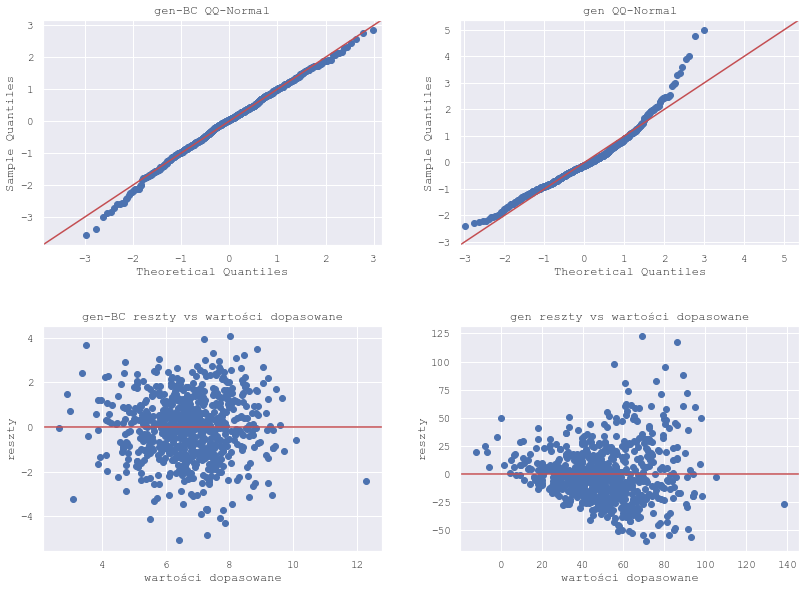

In [35]:
from scipy.special import inv_boxcox
sns.set(font='Courier New')
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 9))

qqplot(modelik_box.resid, fit = True, line = "45", ax=ax[0,0])
ax[0,0].set_title("gen-BC QQ-Normal")

ax[1,0].scatter(modelik_box.fittedvalues, modelik_box.resid)
ax[1,0].axhline(y=0, color='r', linestyle='-')
ax[1,0].set_xlabel("wartości dopasowane")
ax[1,0].set_ylabel("reszty")
ax[1,0].set_title("gen-BC reszty vs wartości dopasowane")

qqplot(modelik.resid, fit = True, line = "45", ax=ax[0,1])
ax[0,1].set_title("gen QQ-Normal")

ax[1,1].scatter(modelik.fittedvalues, modelik.resid)
ax[1,1].axhline(y=0, color='r', linestyle='-')
ax[1,1].set_xlabel("wartości dopasowane")
ax[1,1].set_ylabel("reszty")
ax[1,1].set_title("gen reszty vs wartości dopasowane")


fig.tight_layout(pad=3.0)

plt.show()

##### testy dla modelu ogólnego w wersji standard i box cox

In [30]:
# testy RESET, różne warianty
print("----Model standard ---")
print("test dla drugich potęg:\n\t", linear_reset(modelik, power = 2, test_type= 'fitted', use_f = True))
print("test dla trzecich potęg:\n\t", linear_reset(modelik, power = 3, test_type= 'fitted', use_f = True))
print("test dla drugich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik, power = 2, test_type= 'exog', use_f = True))
print("test dla trzecich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik, power = 3, test_type= 'exog', use_f = True))
print("test dla drugich potęg PCA :\n\t", linear_reset(modelik, power = 2, test_type= 'princomp', use_f = True))
print("test dla trzecich potęg PCA :\n\t", linear_reset(modelik, power = 3, test_type= 'princomp', use_f = True))

print("\n----Model box cox ---")
print("test dla drugich potęg:\n\t", linear_reset(modelik_box, power = 2, test_type= 'fitted', use_f = True))
print("test dla trzecich potęg:\n\t", linear_reset(modelik_box, power = 3, test_type= 'fitted', use_f = True))
print("test dla drugich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik_box, power = 2, test_type= 'exog', use_f = True))
print("test dla trzecich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik_box, power = 3, test_type= 'exog', use_f = True))
print("test dla drugich potęg PCA :\n\t", linear_reset(modelik_box, power = 2, test_type= 'princomp', use_f = True))
print("test dla trzecich potęg PCA :\n\t", linear_reset(modelik_box, power = 3, test_type= 'princomp', use_f = True))


----Model standard ---
test dla drugich potęg:
	 <F test: F=array([[0.41936568]]), p=0.5176001205347012, df_denom=429, df_num=1>
test dla trzecich potęg:
	 <F test: F=array([[3.44878569]]), p=0.032670240604655475, df_denom=428, df_num=2>
test dla drugich potęg (wyłączając zmienne binarne):
	 <F test: F=array([[1.55707993]]), p=0.19918492544053581, df_denom=427, df_num=3>
test dla trzecich potęg (wyłączając zmienne binarne):
	 <F test: F=array([[2.23804522]]), p=0.03876836733423519, df_denom=424, df_num=6>
test dla drugich potęg PCA :
	 <F test: F=array([[1.46012276]]), p=0.22757623084947393, df_denom=429, df_num=1>
test dla trzecich potęg PCA :
	 <F test: F=array([[1.13765237]]), p=0.32153814539109205, df_denom=428, df_num=2>

----Model box cox ---
test dla drugich potęg:
	 <F test: F=array([[5.04330187]]), p=0.025229664388390766, df_denom=429, df_num=1>
test dla trzecich potęg:
	 <F test: F=array([[4.0480779]]), p=0.018128558744108413, df_denom=428, df_num=2>
test dla drugich potęg (w

In [31]:
# test breuscha-pagana dla naszego modelu (statystyka, p_value)
bp_box = het_breuschpagan(modelik_box.resid, modelik_box.model.exog)[:2]
bp_standard = het_breuschpagan(modelik.resid, modelik.model.exog)[:2]

bp_mat = np.array((bp_box[0], bp_box[1], bp_standard[0], bp_standard[1])).reshape(2,-1)

display(pd.DataFrame(bp_mat, index = ("box_cox", "standard"), columns=("stat", "p_value")))

,stat,p_value
box_cox,18.036221,0.006142
standard,25.931788,0.000229


In [32]:
# test whitea dla naszego modelu (statystyka, p_value)
white_box = het_white(modelik_box.resid, modelik_box.model.exog)[:2]
white_standard = het_white(modelik.resid, modelik.model.exog)[:2]

white_mat = np.array((white_box[0], white_box[1], white_standard[0], white_standard[1])).reshape(2,-1)

display(pd.DataFrame(white_mat, index = ("box_cox", "standard"), columns=("stat", "p_value")))

,stat,p_value
box_cox,31.203071,0.070344
standard,28.892317,0.116611


In [33]:
JB = normality_test(modelik)
JB_box = normality_test(modelik_box)

JB_mat = np.array((JB_box[0], JB_box[2], JB[0], JB[2])).reshape(2, -1)

display(pd.DataFrame(JB_mat, index = ("box_cox", "standard"), columns = ("stat", "p_value")))

,stat,p_value
box_cox,4.243168,0.119842
standard,2677.356027,0.000000


In [34]:
RM = normality_test(modelik,rescaled_moments = True)
RM_box = normality_test(modelik_box, rescaled_moments = True)

RM_mat = np.array((RM_box[0], RM_box[2], RM[0], RM[2])).reshape(2, -1)

display(pd.DataFrame(RM_mat, index = ("box_cox", "standard"), columns = ("stat", "p_value")))

,stat,p_value
box_cox,4.501726,0.105308
standard,2850.633356,0.000000


##### Testowanie istotności zmiennych (sezonów)

In [37]:
# --- test lr ---
# specyfikacja modelu
target="monthly_rainfall_sum_mm"
to_delete = ["spring", "winter"]
features_restricted = [i for i in features if i not in to_delete]
#features=["average_month_temp", "monthly_sunhours_sum", "num_of_days_hoarfrost", "num_of_days_storm"]

# wyciągnięcie danych
X, Y = get_data(station, target, features_restricted, data)
#, control_zero="monthly_sunhours_sum"
# model z restrykcjami
modelik_restricted, vify = OLS(X, Y, get_vif=True)

# test lr
print("test lr:",modelik.compare_lr_test(modelik_restricted)[:2])
msg = "{} łącznie nieistotne" if modelik.compare_lr_test(modelik_restricted)[1] > 0.05 else "{} łącznie istotne"
print(msg.format(to_delete))

display(vify)
# jeżeli uwzględniamy storm to sezony nieistotne!

# diagnostyka
display(get_metrices(modelik_restricted, Y))
print("test bp:", het_breuschpagan(modelik_restricted.resid, modelik_restricted.model.exog)[:2])
print("test white:", het_white(modelik_restricted.resid, modelik_restricted.model.exog)[:2])
print("test JB:", (normality_test(modelik_restricted)[0], normality_test(modelik_restricted)[2]))
print("test RM:", (normality_test(modelik_restricted, rescaled_moments = True)[0],
      normality_test(modelik_restricted, rescaled_moments = True)[2]))

print("\n----Testy RESET ---")
print("test dla drugich potęg:\n\t", linear_reset(modelik_restricted, power = 2, test_type= 'fitted', use_f = True))
print("test dla trzecich potęg:\n\t", linear_reset(modelik_restricted, power = 3, test_type= 'fitted', use_f = True))
print("test dla drugich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik_restricted, power = 2, test_type= 'exog', use_f = True))
print("test dla trzecich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik_restricted, power = 3, test_type= 'exog', use_f = True))
print("test dla drugich potęg PCA :\n\t", linear_reset(modelik_restricted, power = 2, test_type= 'princomp', use_f = True))
print("test dla trzecich potęg PCA :\n\t", linear_reset(modelik_restricted, power = 3, test_type= 'princomp', use_f = True))

test lr: (2581.914327353168, 0.0)
['spring', 'winter'] łącznie istotne


,Zmienna,VIF
0,average_month_temp,4.02
1,num_of_days_hoarfrost,1.04
2,monthly_sunhours_sum,2.29
3,summer,2.64


C:\Users\maciej\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


,mse,rmse,mae,mape
0,764.711746,27.653422,19.099117,inf


test bp: (33.00709250554573, 1.1904933590075723e-06)
test white: (38.159130006535364, 0.00027204096389463975)
test JB: (2997.8858323545937, 0.0)
test RM: (3081.0985658236764, 0.0)

----Testy RESET ---
test dla drugich potęg:
	 <F test: F=array([[11.86147618]]), p=0.0006071203539273657, df_denom=702, df_num=1>
test dla trzecich potęg:
	 <F test: F=array([[8.38727734]]), p=0.000251391637331708, df_denom=701, df_num=2>
test dla drugich potęg (wyłączając zmienne binarne):
	 <F test: F=array([[4.40399959]]), p=0.0044290018283032785, df_denom=700, df_num=3>
test dla trzecich potęg (wyłączając zmienne binarne):
	 <F test: F=array([[2.95836474]]), p=0.007377813640309646, df_denom=697, df_num=6>
test dla drugich potęg PCA :
	 <F test: F=array([[0.05592459]]), p=0.8131262641480803, df_denom=702, df_num=1>
test dla trzecich potęg PCA :
	 <F test: F=array([[0.230932]]), p=0.7938538067906611, df_denom=701, df_num=2>


In [38]:
# --- Box-Cox na modelu z restrykcjami ---
# wyciągnięcie danych
X, Y = get_data(station, target, features_restricted, data)
#, control_zero="monthly_sunhours_sum"
# model b-c
lmbda_restricted, modelik_restricted_bc, vify = OLS(X, Y, box_cox = True, get_vif=True)

# diagnostyka
display(vify)
display(get_metrices(modelik_restricted_bc, Y, lmbda_restricted))
print("test bp:", het_breuschpagan(modelik_restricted_bc.resid, modelik_restricted_bc.model.exog)[:2])
print("test white:", het_white(modelik_restricted_bc.resid, modelik_restricted_bc.model.exog)[:2])
print("test JB:", (normality_test(modelik_restricted_bc)[0], normality_test(modelik_restricted_bc)[2]))
print("test RM:", (normality_test(modelik_restricted_bc, rescaled_moments = True)[0],
      normality_test(modelik_restricted_bc, rescaled_moments = True)[2]))

print("\n----Testy RESET ---")
print("test dla drugich potęg:\n\t", linear_reset(modelik_restricted_bc, power = 2, test_type= 'fitted', use_f = True))
print("test dla trzecich potęg:\n\t", linear_reset(modelik_restricted_bc, power = 3, test_type= 'fitted', use_f = True))
print("test dla drugich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik_restricted_bc, power = 2, test_type= 'exog', use_f = True))
print("test dla trzecich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik_restricted_bc, power = 3, test_type= 'exog', use_f = True))
print("test dla drugich potęg PCA :\n\t", linear_reset(modelik_restricted_bc, power = 2,
                                                       test_type= 'princomp', use_f = True))
print("test dla trzecich potęg PCA :\n\t", linear_reset(modelik_restricted_bc, power = 3,
                                                        test_type= 'princomp', use_f = True))

C:\Users\maciej\anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: dane zostały powiększone -> 
Y = Y + (abs(y_min) + 10**(-10)) 


,Zmienna,VIF
0,average_month_temp,4.02
1,num_of_days_hoarfrost,1.04
2,monthly_sunhours_sum,2.29
3,summer,2.64


C:\Users\maciej\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


,mse,rmse,mae,mape
0,799.207146,28.270252,19.040781,inf


test bp: (9.736147869463041, 0.04511468503763005)
test white: (22.45115059723629, 0.0487537746198632)
test JB: (32.40136061162053, 9.207334894512087e-08)
test RM: (33.287848545483946, 5.910653921858966e-08)

----Testy RESET ---
test dla drugich potęg:
	 <F test: F=array([[22.39738874]]), p=2.6816220147377957e-06, df_denom=702, df_num=1>
test dla trzecich potęg:
	 <F test: F=array([[13.26541774]]), p=2.214357907572078e-06, df_denom=701, df_num=2>
test dla drugich potęg (wyłączając zmienne binarne):
	 <F test: F=array([[7.35552502]]), p=7.383364897390285e-05, df_denom=700, df_num=3>
test dla trzecich potęg (wyłączając zmienne binarne):
	 <F test: F=array([[3.9343377]]), p=0.000707490931604799, df_denom=697, df_num=6>
test dla drugich potęg PCA :
	 <F test: F=array([[0.25918513]]), p=0.610840510104481, df_denom=702, df_num=1>
test dla trzecich potęg PCA :
	 <F test: F=array([[0.22906184]]), p=0.7953388526845764, df_denom=701, df_num=2>


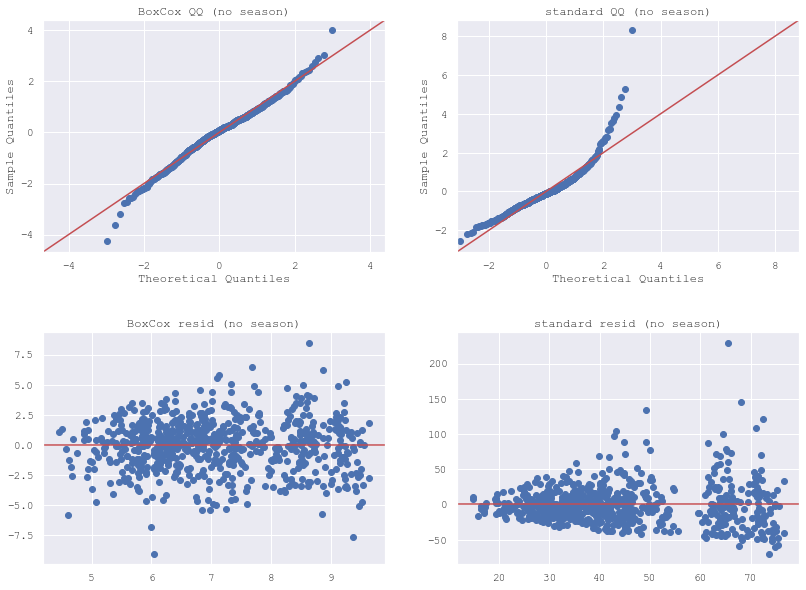

In [39]:
# wykresy dla modeli bez sezonów

sns.set(font='Courier New')
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 9))

qqplot(modelik_restricted_bc.resid, fit = True, line = "45", ax=ax[0,0])
ax[0,0].set_title("BoxCox QQ (no season)")

ax[1,0].scatter(modelik_restricted_bc.fittedvalues, modelik_restricted_bc.resid)
ax[1,0].axhline(y=0, color='r', linestyle='-')
ax[1,0].set_title("BoxCox resid (no season)")

qqplot(modelik_restricted.resid, fit = True, line = "45", ax=ax[0,1])
ax[0,1].set_title("standard QQ (no season)")

ax[1,1].scatter(modelik_restricted.fittedvalues, modelik_restricted.resid)
ax[1,1].axhline(y=0, color='r', linestyle='-')
ax[1,1].set_title("standard resid (no season)")


fig.tight_layout(pad=3.0)

plt.show()

In [40]:
# tabela prównawcza : ogólny standard, no_season standard, ogólny bc, no_season bc 
Stargazer([modelik, modelik_restricted, modelik_box, modelik_restricted_bc])

##### Wersja z podziałem na zbiór treningowy i testowy<br>
- estymacja

In [40]:
# dostępne stacje
data.station_name.unique()

array(['ZAKOPANE', 'KRAKÓW-BALICE', 'WROCŁAW-STRACHOWICE', 'WROCŁAW',
       'WIELUŃ', 'ŁÓDŹ-LUBLINEK', 'ŁODŹ', 'LUBLIN-RADAWIEC',
       'POZNAŃ-ŁAWICA', 'POZNAŃ', 'WARSZAWA-OKĘCIE', 'WARSZAWA',
       'SIEDLCE', 'ŚWINOUJŚCIE', 'SZCZECIN', 'MŁAWA',
       'KOŁOBRZEG-DŹWIRZYNO', 'KOŁOBRZEG', 'USTKA', 'ŁEBA', 'HEL',
       'ELBLĄG-MILEJEWO', 'SUWAŁKI'], dtype=object)

In [41]:
# specyfikacja modelu
target="monthly_rainfall_sum_mm"
features=["average_month_temp", "num_of_days_hoarfrost", "monthly_sunhours_sum",
          "spring", "summer", "winter"]
station="SUWAŁKI"

# pozyskanie danych
X, Y = get_data(station,target, features, data, "monthly_sunhours_sum")

# usunięcie kolumny "monthly_sunhours_sum" (opcjonalne)
#X.drop("monthly_sunhours_sum", axis = 1, inplace = True)

# podział danych na próbę testową i treningową
X_test, Y_test, X_train, Y_train = train_test_split(X, Y, 0.1)

modelik, vify = OLS(X_train, Y_train, get_vif = True)
lmbda, modelik_box = OLS(X_train, Y_train,box_cox = True)
modelik_lag_1 = OLS(X_train, Y_train, lag = 1)[0]
modelik_lag_1_ar = OLS(X_train, Y_train, lag = 1, ar = True)[0]

# tabela porównawcza
display(Stargazer([modelik, modelik_box, modelik_lag_1, modelik_lag_1_ar]))

# vify
display(vify)

# metryki dla modeli z sezonami
display(get_metrices(modelik, Y_train).rename({0:"standard"}, axis = 0))
display(get_metrices(modelik_box, Y_train, lmbda).rename({0:"boxcox"}, axis = 0))

,Zmienna,VIF
0,average_month_temp,9.05
1,num_of_days_hoarfrost,1.38
2,monthly_sunhours_sum,14.04
3,spring,3.03
4,summer,4.58
5,winter,1.89


,mse,rmse,mae,mape
standard,605.095236,24.598684,18.307137,56.297312


,mse,rmse,mae,mape
boxcox,597.94703,24.452955,17.637247,50.322079


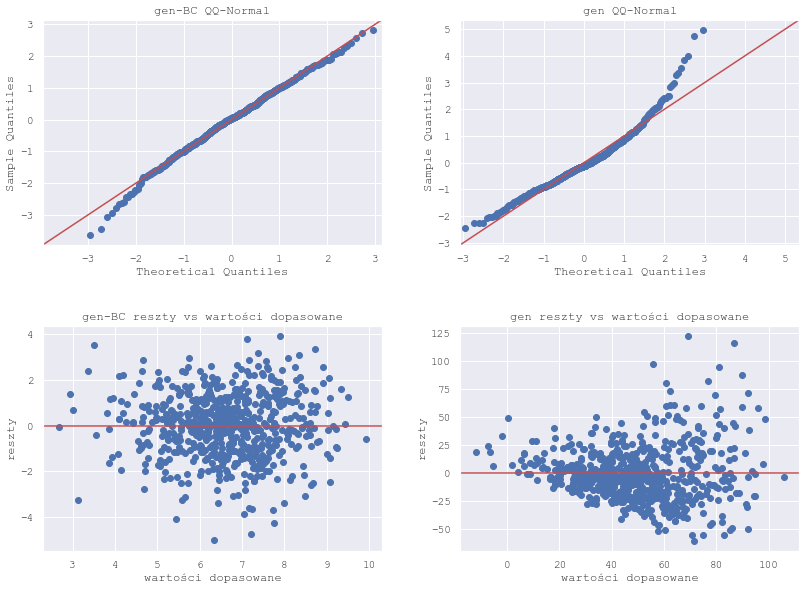

In [42]:
from scipy.special import inv_boxcox
sns.set(font='Courier New')
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 9))

qqplot(modelik_box.resid, fit = True, line = "45", ax=ax[0,0])
ax[0,0].set_title("gen-BC QQ-Normal")

ax[1,0].scatter(modelik_box.fittedvalues, modelik_box.resid)
ax[1,0].axhline(y=0, color='r', linestyle='-')
ax[1,0].set_xlabel("wartości dopasowane")
ax[1,0].set_ylabel("reszty")
ax[1,0].set_title("gen-BC reszty vs wartości dopasowane")

qqplot(modelik.resid, fit = True, line = "45", ax=ax[0,1])
ax[0,1].set_title("gen QQ-Normal")

ax[1,1].scatter(modelik.fittedvalues, modelik.resid)
ax[1,1].axhline(y=0, color='r', linestyle='-')
ax[1,1].set_xlabel("wartości dopasowane")
ax[1,1].set_ylabel("reszty")
ax[1,1].set_title("gen reszty vs wartości dopasowane")


fig.tight_layout(pad=3.0)

plt.show()

In [159]:
# testy RESET, różne warianty
print("----Model standard ---")
print("test dla drugich potęg:\n\t", linear_reset(modelik, power = 2, test_type= 'fitted', use_f = True))
print("test dla trzecich potęg:\n\t", linear_reset(modelik, power = 3, test_type= 'fitted', use_f = True))
print("test dla drugich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik, power = 2, test_type= 'exog', use_f = True))
print("test dla trzecich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik, power = 3, test_type= 'exog', use_f = True))
print("test dla drugich potęg PCA :\n\t", linear_reset(modelik, power = 2, test_type= 'princomp', use_f = True))
print("test dla trzecich potęg PCA :\n\t", linear_reset(modelik, power = 3, test_type= 'princomp', use_f = True))

print("\n----Model box cox ---")
print("test dla drugich potęg:\n\t", linear_reset(modelik_box, power = 2, test_type= 'fitted', use_f = True))
print("test dla trzecich potęg:\n\t", linear_reset(modelik_box, power = 3, test_type= 'fitted', use_f = True))
print("test dla drugich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik_box, power = 2, test_type= 'exog', use_f = True))
print("test dla trzecich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik_box, power = 3, test_type= 'exog', use_f = True))
print("test dla drugich potęg PCA :\n\t", linear_reset(modelik_box, power = 2, test_type= 'princomp', use_f = True))
print("test dla trzecich potęg PCA :\n\t", linear_reset(modelik_box, power = 3, test_type= 'princomp', use_f = True))


----Model standard ---
test dla drugich potęg:
	 <F test: F=array([[10.55979247]]), p=0.001223114566365452, df_denom=576, df_num=1>
test dla trzecich potęg:
	 <F test: F=array([[22.275929]]), p=4.810353857067047e-10, df_denom=575, df_num=2>
test dla drugich potęg (wyłączając zmienne binarne):
	 <F test: F=array([[7.54711116]]), p=5.855077261619045e-05, df_denom=574, df_num=3>
test dla trzecich potęg (wyłączając zmienne binarne):
	 <F test: F=array([[5.00362719]]), p=5.197310638322763e-05, df_denom=571, df_num=6>
test dla drugich potęg PCA :
	 <F test: F=array([[1.47149105]]), p=0.22560782203124444, df_denom=576, df_num=1>
test dla trzecich potęg PCA :
	 <F test: F=array([[5.9057902]]), p=0.0028915855747039887, df_denom=575, df_num=2>

----Model box cox ---
test dla drugich potęg:
	 <F test: F=array([[38.47862199]]), p=1.0575635881820873e-09, df_denom=576, df_num=1>
test dla trzecich potęg:
	 <F test: F=array([[23.75163063]]), p=1.2268357736758402e-10, df_denom=575, df_num=2>
test dla d

In [160]:
# test breuscha-pagana dla naszego modelu (statystyka, p_value)
bp_box = het_breuschpagan(modelik_box.resid, modelik_box.model.exog)[:2]
bp_standard = het_breuschpagan(modelik.resid, modelik.model.exog)[:2]

bp_mat = np.array((bp_box[0], bp_box[1], bp_standard[0], bp_standard[1])).reshape(2,-1)

display(pd.DataFrame(bp_mat, index = ("box_cox", "standard"), columns=("stat", "p_value")))

,stat,p_value
box_cox,37.111936,1.674589e-06
standard,70.780881,2.827479e-13


In [ ]:
# test breuscha-godfreya dla naszego modelu (statystyka, p_value)
bg_box = acorr_breusch_godfrey(modelik_box, 2)[:2]
bg_standard = acorr_breusch_godfrey(modelik, 2)[:2]

bg_mat = np.array((bg_box[0], bg_box[1], bg_standard[0], bg_standard[1])).reshape(2,-1)

display(pd.DataFrame(bg_mat, index = ("box_cox", "standard"), columns=("stat", "p_value")))

In [161]:
# test whitea dla naszego modelu (statystyka, p_value)
white_box = het_white(modelik_box.resid, modelik_box.model.exog)[:2]
white_standard = het_white(modelik.resid, modelik.model.exog)[:2]

white_mat = np.array((white_box[0], white_box[1], white_standard[0], white_standard[1])).reshape(2,-1)

display(pd.DataFrame(white_mat, index = ("box_cox", "standard"), columns=("stat", "p_value")))

,stat,p_value
box_cox,84.817677,1.245052e-09
standard,83.728354,1.905106e-09


In [162]:
# test Jarque-Bera dla naszego modelu (statystyka, p_value)
JB = normality_test(modelik)
JB_box = normality_test(modelik_box)

JB_mat = np.array((JB_box[0], JB_box[2], JB[0], JB[2])).reshape(2, -1)

display(pd.DataFrame(JB_mat, index = ("box_cox", "standard"), columns = ("stat", "p_value")))

,stat,p_value
box_cox,14.753328,0.000626
standard,1211.423029,0.000000


In [163]:
# test Rescaled Moments dla naszego modelu (statystyka, p_value)
RM = normality_test(modelik,rescaled_moments = True)
RM_box = normality_test(modelik_box, rescaled_moments = True)

RM_mat = np.array((RM_box[0], RM_box[2], RM[0], RM[2])).reshape(2, -1)

display(pd.DataFrame(RM_mat, index = ("box_cox", "standard"), columns = ("stat", "p_value")))

,stat,p_value
box_cox,15.369298,0.00046
standard,1268.872890,0.00000


- predykcje

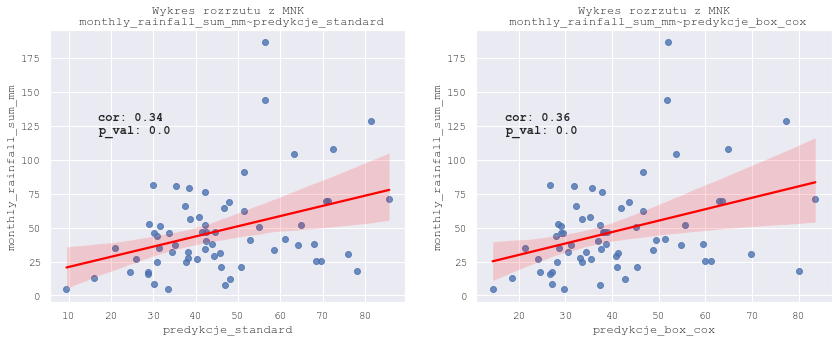

In [164]:
# zdefiniowanie predykcji modeli i złączenie ich w df
Y_pred = modelik.predict(X_test)
Y_pred_box = inv_boxcox(modelik_box.predict(X_test), lmbda)
dane_pred = pd.concat((Y_pred, Y_pred_box, Y_test), axis = 1)
dane_pred.rename({0:"predykcje_standard", 1:"predykcje_box_cox"}, axis = 1, inplace = True)

# ----- Wykresy -----
# korelacja spearmana i textbox dla predykcji standardowych
cor_standard = spearmanr(dane_pred["predykcje_standard"], dane_pred["monthly_rainfall_sum_mm"])
textbox_standard = "cor: {}\np_val: {}".format(round(cor_standard[0], 2), round(cor_standard[1], 2))

# korelacja spearmana i textbox dla predykcji box_cox
cor_box = spearmanr(dane_pred["predykcje_box_cox"], dane_pred["monthly_rainfall_sum_mm"])
textbox_box = "cor: {}\np_val: {}".format(round(cor_box[0], 2), round(cor_box[1], 2))


# zdefiniowanie figury
fig, ax = plt.subplots(nrows = 1, ncols=2,figsize = (14,5))
# predykcje standardowe
sns.regplot(x="predykcje_standard", y="monthly_rainfall_sum_mm", data = dane_pred, line_kws={"color": "red"}, ax = ax[0])
ax[0].set_title("Wykres rozrzutu z MNK\n monthly_rainfall_sum_mm~predykcje_standard")
ax[0].set_xlabel("predykcje_standard")
ax[0].set_ylabel("monthly_rainfall_sum_mm")
ax[0].text(17,120, textbox_standard,  weight="bold")
# predykcje box_cox
sns.regplot(x="predykcje_box_cox", y="monthly_rainfall_sum_mm", data = dane_pred, line_kws={"color": "red"}, ax = ax[1])
ax[1].set_title("Wykres rozrzutu z MNK\n monthly_rainfall_sum_mm~predykcje_box_cox")
ax[1].set_xlabel("predykcje_box_cox")
ax[1].set_ylabel("monthly_rainfall_sum_mm")
ax[1].text(17,120, textbox_box,  weight="bold")

plt.show()

In [165]:
display(get_metrices_pred(modelik,Y_test, X_test))
display(get_metrices_pred(modelik_box,Y_test, X_test, lmbda))

,mse,rmse,mae,mape
0,967.70725,31.107993,22.339955,73.247384


,mse,rmse,mae,mape
0,991.591478,31.489546,22.108695,67.488405


##### Usunięcie zmiennej z najwyższym VIFem

In [37]:
# specyfikacja modelu
target="monthly_rainfall_sum_mm"
features=["average_month_temp", "num_of_days_hoarfrost", "monthly_sunhours_sum",
          "spring", "summer", "winter"]
station="SUWAŁKI"

# pozyskanie danych
X, Y = get_data(station,target, features, data, "monthly_sunhours_sum")

# usunięcie kolumny "monthly_sunhours_sum" (opcjonalne)
X.drop("monthly_sunhours_sum", axis = 1, inplace = True)

# podział danych na próbę testową i treningową
X_test, Y_test, X_train, Y_train = train_test_split(X, Y, 0.1)

modelik, vify = OLS(X_train, Y_train, get_vif = True)
lmbda, modelik_box = OLS(X_train, Y_train,box_cox = True)
modelik_lag_1 = OLS(X_train, Y_train, lag = 1)[0]
modelik_lag_1_ar = OLS(X_train, Y_train, lag = 1, ar = True)[0]

# tabela porównawcza
display(Stargazer([modelik, modelik_box, modelik_lag_1, modelik_lag_1_ar]))

# vify
display(vify)

# metryki dla modeli z sezonami
display(get_metrices(modelik, Y_train).rename({0:"standard"}, axis = 0))
display(get_metrices(modelik_box, Y_train, lmbda).rename({0:"boxcox"}, axis = 0))

,Zmienna,VIF
0,average_month_temp,4.18
1,num_of_days_hoarfrost,1.35
2,spring,1.43
3,summer,3.59
4,winter,1.20


,mse,rmse,mae,mape
standard,741.416279,27.22896,20.063212,69.376865


,mse,rmse,mae,mape
boxcox,774.906512,27.837143,20.065079,62.602792


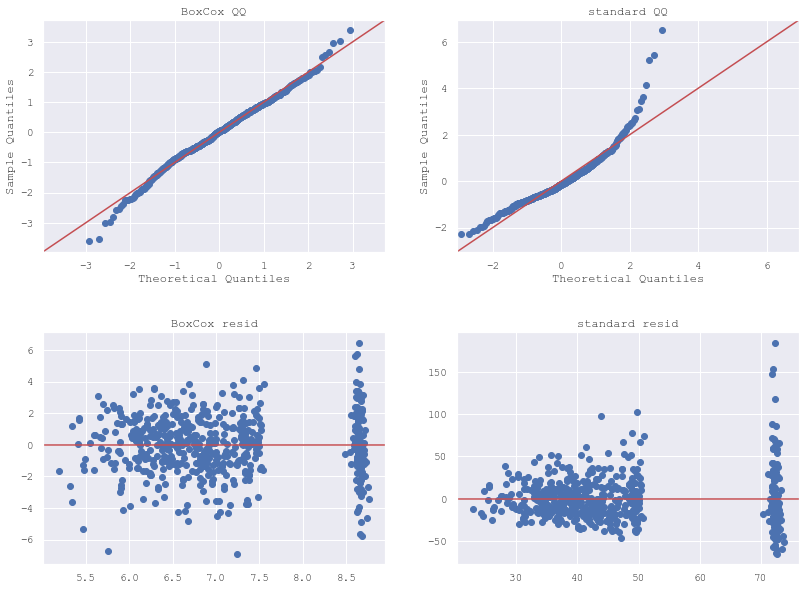

In [167]:
from scipy.special import inv_boxcox
sns.set(font='Courier New')
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 9))

qqplot(modelik_box.resid, fit = True, line = "45", ax=ax[0,0])
ax[0,0].set_title("BoxCox QQ")

ax[1,0].scatter(modelik_box.fittedvalues, modelik_box.resid)
ax[1,0].axhline(y=0, color='r', linestyle='-')
ax[1,0].set_title("BoxCox resid")

qqplot(modelik.resid, fit = True, line = "45", ax=ax[0,1])
ax[0,1].set_title("standard QQ")

ax[1,1].scatter(modelik.fittedvalues, modelik.resid)
ax[1,1].axhline(y=0, color='r', linestyle='-')
ax[1,1].set_title("standard resid")


fig.tight_layout(pad=3.0)

plt.show()

In [168]:
# testy RESET, różne warianty
print("----Model standard ---")
print("test dla drugich potęg:\n\t", linear_reset(modelik, power = 2, test_type= 'fitted', use_f = True))
print("test dla trzecich potęg:\n\t", linear_reset(modelik, power = 3, test_type= 'fitted', use_f = True))
print("test dla drugich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik, power = 2, test_type= 'exog', use_f = True))
print("test dla trzecich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik, power = 3, test_type= 'exog', use_f = True))
print("test dla drugich potęg PCA :\n\t", linear_reset(modelik, power = 2, test_type= 'princomp', use_f = True))
print("test dla trzecich potęg PCA :\n\t", linear_reset(modelik, power = 3, test_type= 'princomp', use_f = True))

print("\n----Model box cox ---")
print("test dla drugich potęg:\n\t", linear_reset(modelik_box, power = 2, test_type= 'fitted', use_f = True))
print("test dla trzecich potęg:\n\t", linear_reset(modelik_box, power = 3, test_type= 'fitted', use_f = True))
print("test dla drugich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik_box, power = 2, test_type= 'exog', use_f = True))
print("test dla trzecich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik_box, power = 3, test_type= 'exog', use_f = True))
print("test dla drugich potęg PCA :\n\t", linear_reset(modelik_box, power = 2, test_type= 'princomp', use_f = True))
print("test dla trzecich potęg PCA :\n\t", linear_reset(modelik_box, power = 3, test_type= 'princomp', use_f = True))


----Model standard ---
test dla drugich potęg:
	 <F test: F=array([[1.76632757]]), p=0.18436251085578137, df_denom=577, df_num=1>
test dla trzecich potęg:
	 <F test: F=array([[7.28064261]]), p=0.0007539855134748294, df_denom=576, df_num=2>
test dla drugich potęg (wyłączając zmienne binarne):
	 <F test: F=array([[17.87414109]]), p=2.9425291785238993e-08, df_denom=576, df_num=2>
test dla trzecich potęg (wyłączając zmienne binarne):
	 <F test: F=array([[10.4507622]]), p=3.542359892973886e-08, df_denom=574, df_num=4>
test dla drugich potęg PCA :
	 <F test: F=array([[8.15488623]]), p=0.004449076289710837, df_denom=577, df_num=1>
test dla trzecich potęg PCA :
	 <F test: F=array([[12.30661484]]), p=5.839097279516982e-06, df_denom=576, df_num=2>

----Model box cox ---
test dla drugich potęg:
	 <F test: F=array([[3.36161655]]), p=0.06724748382844824, df_denom=577, df_num=1>
test dla trzecich potęg:
	 <F test: F=array([[2.85287492]]), p=0.058493624399511675, df_denom=576, df_num=2>
test dla drug

In [169]:
# test breuscha-pagana dla naszego modelu (statystyka, p_value)
bp_box = het_breuschpagan(modelik_box.resid, modelik_box.model.exog)[:2]
bp_standard = het_breuschpagan(modelik.resid, modelik.model.exog)[:2]

bp_mat = np.array((bp_box[0], bp_box[1], bp_standard[0], bp_standard[1])).reshape(2,-1)

display(pd.DataFrame(bp_mat, index = ("box_cox", "standard"), columns=("stat", "p_value")))

,stat,p_value
box_cox,12.671282,2.666187e-02
standard,39.663346,1.745956e-07


In [ ]:
# test breuscha-godfreya dla naszego modelu (statystyka, p_value)
bg_box = acorr_breusch_godfrey(modelik_box, 2)[:2]
bg_standard = acorr_breusch_godfrey(modelik, 2)[:2]

bg_mat = np.array((bg_box[0], bg_box[1], bg_standard[0], bg_standard[1])).reshape(2,-1)

display(pd.DataFrame(bg_mat, index = ("box_cox", "standard"), columns=("stat", "p_value")))

In [170]:
# test whitea dla naszego modelu (statystyka, p_value)
white_box = het_white(modelik_box.resid, modelik_box.model.exog)[:2]
white_standard = het_white(modelik.resid, modelik.model.exog)[:2]

white_mat = np.array((white_box[0], white_box[1], white_standard[0], white_standard[1])).reshape(2,-1)

display(pd.DataFrame(white_mat, index = ("box_cox", "standard"), columns=("stat", "p_value")))

,stat,p_value
box_cox,23.401791,0.054038
standard,46.261806,0.000025


In [171]:
# test Jarque-Bera dla naszego modelu (statystyka, p_value)
JB = normality_test(modelik)
JB_box = normality_test(modelik_box)

JB_mat = np.array((JB_box[0], JB_box[2], JB[0], JB[2])).reshape(2, -1)

display(pd.DataFrame(JB_mat, index = ("box_cox", "standard"), columns = ("stat", "p_value")))

,stat,p_value
box_cox,14.121027,0.000858
standard,1099.635860,0.000000


In [172]:
# test Rescaled Moments dla naszego modelu (statystyka, p_value)
RM = normality_test(modelik,rescaled_moments = True)
RM_box = normality_test(modelik_box, rescaled_moments = True)

RM_mat = np.array((RM_box[0], RM_box[2], RM[0], RM[2])).reshape(2, -1)

display(pd.DataFrame(RM_mat, index = ("box_cox", "standard"), columns = ("stat", "p_value")))

,stat,p_value
box_cox,14.671749,0.000652
standard,1143.497300,0.000000


- predykcje

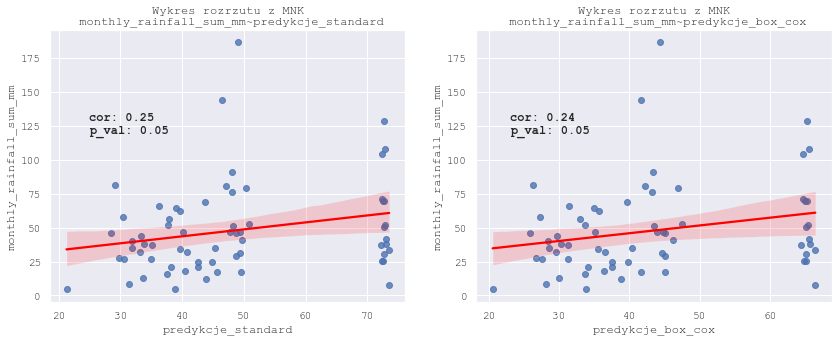

In [173]:
# zdefiniowanie predykcji modeli i złączenie ich w df
Y_pred = modelik.predict(X_test)
Y_pred_box = inv_boxcox(modelik_box.predict(X_test), lmbda)
dane_pred = pd.concat((Y_pred, Y_pred_box, Y_test), axis = 1)
dane_pred.rename({0:"predykcje_standard", 1:"predykcje_box_cox"}, axis = 1, inplace = True)

# ----- Wykresy -----
# korelacja spearmana i textbox dla predykcji standardowych
cor_standard = spearmanr(dane_pred["predykcje_standard"], dane_pred["monthly_rainfall_sum_mm"])
textbox_standard = "cor: {}\np_val: {}".format(round(cor_standard[0], 2), round(cor_standard[1], 2))

# korelacja spearmana i textbox dla predykcji box_cox
cor_box = spearmanr(dane_pred["predykcje_box_cox"], dane_pred["monthly_rainfall_sum_mm"])
textbox_box = "cor: {}\np_val: {}".format(round(cor_box[0], 2), round(cor_box[1], 2))


# zdefiniowanie figury
fig, ax = plt.subplots(nrows = 1, ncols=2,figsize = (14,5))
# predykcje standardowe
sns.regplot(x="predykcje_standard", y="monthly_rainfall_sum_mm", data = dane_pred, line_kws={"color": "red"}, ax = ax[0])
ax[0].set_title("Wykres rozrzutu z MNK\n monthly_rainfall_sum_mm~predykcje_standard")
ax[0].set_xlabel("predykcje_standard")
ax[0].set_ylabel("monthly_rainfall_sum_mm")
ax[0].text(25,120, textbox_standard,  weight="bold")
# predykcje box_cox
sns.regplot(x="predykcje_box_cox", y="monthly_rainfall_sum_mm", data = dane_pred, line_kws={"color": "red"}, ax = ax[1])
ax[1].set_title("Wykres rozrzutu z MNK\n monthly_rainfall_sum_mm~predykcje_box_cox")
ax[1].set_xlabel("predykcje_box_cox")
ax[1].set_ylabel("monthly_rainfall_sum_mm")
ax[1].text(23,120, textbox_box,  weight="bold")

plt.show()

In [174]:
display(get_metrices_pred(modelik,Y_test, X_test))
display(get_metrices_pred(modelik_box,Y_test, X_test, lmbda))

,mse,rmse,mae,mape
0,1092.67088,33.055573,23.987108,88.800694


,mse,rmse,mae,mape
0,1090.113442,33.016866,23.377863,79.229458


##### Eksperyment PCA

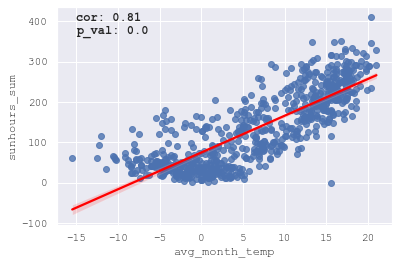

Wariancja average_month_temp, monthly_sunhours_sum wyjaśniona 1 komponentem: 0.9973255235484244%


,Zmienna,VIF
0,Temp_sun_PCA,3.02
1,num_of_days_hoarfrost,1.37
2,spring,1.47
3,summer,1.96
4,winter,1.76


,mse,rmse,mae,mape
standard,709.400496,26.634573,20.141901,66.87909


,mse,rmse,mae,mape
boxcox,720.301264,26.838429,19.629312,60.106449


In [46]:
# specyfikacja modelu
target="monthly_rainfall_sum_mm"
features=["average_month_temp", "num_of_days_hoarfrost", "monthly_sunhours_sum",
          "spring", "summer", "winter"]
station="SUWAŁKI"

# pozyskanie danych
X, Y = get_data(station,target, features, data, "monthly_sunhours_sum")

# ----- WYKRES -----
cor_temp_sun = spearmanr(X["average_month_temp"], X["monthly_sunhours_sum"])
textbox_standard = "cor: {}\np_val: {}".format(round(cor_temp_sun[0], 2), round(cor_temp_sun[1], 2))

ax = sns.regplot(x="average_month_temp", y="monthly_sunhours_sum", data = X, line_kws={"color": "red"})
#plt.title("Wykres rozrzutu z MNK\n sunhours_sum~avg_month_temp")
plt.xlabel("avg_month_temp")
plt.ylabel("sunhours_sum")
plt.text(-15,370, textbox_standard,  weight="bold")
plt.show()


# ----- PCA -----
# utworzenie obiektu pca ze zdefiniowaną liczbą komponentów
pca = PCA(n_components = 1)
# zdefiniowanie zmiennych do transformacji
zmienne_pca = ["average_month_temp", "monthly_sunhours_sum"]
# transformacja PCA, zapis do df
Xpca = pd.DataFrame(pca.fit(X[zmienne_pca]).transform(X[zmienne_pca]), columns=["Temp_sun_PCA"], index=X.index.tolist())
# konkatenacja
X = pd.concat((Xpca, X), axis = 1)
# usunięcie zmiennych sprzed transformacji
X.drop(labels = zmienne_pca, axis = 1, inplace = True)
# informacja o wyjaśnionej wariancji
print("Wariancja {} wyjaśniona 1 komponentem: {}%".format(", ".join(zmienne_pca), pca.explained_variance_ratio_[0]))

# podział danych na próbę testową i treningową
X_test, Y_test, X_train, Y_train = train_test_split(X, Y, 0.1)

modelik, vify = OLS(X_train, Y_train, get_vif = True)
lmbda, modelik_box = OLS(X_train, Y_train,box_cox = True)
modelik_lag_1 = OLS(X_train, Y_train, lag = 1)[0]
modelik_lag_1_ar = OLS(X_train, Y_train, lag = 1, ar = True)[0]

# tabela porównawcza
display(Stargazer([modelik, modelik_box, modelik_lag_1, modelik_lag_1_ar]))

# vify
display(vify)

# metryki dla modeli z sezonami
display(get_metrices(modelik, Y_train).rename({0:"standard"}, axis = 0))
display(get_metrices(modelik_box, Y_train, lmbda).rename({0:"boxcox"}, axis = 0))

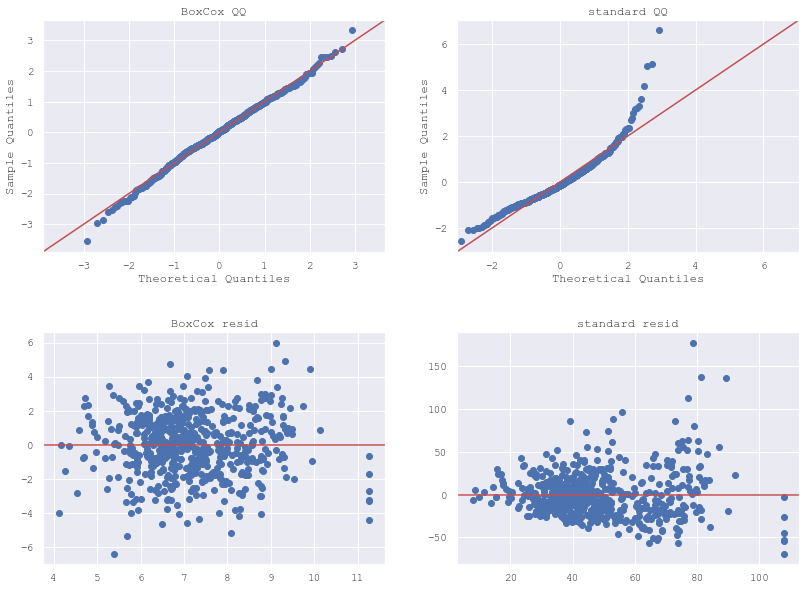

In [176]:
from scipy.special import inv_boxcox
sns.set(font='Courier New')
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 9))

qqplot(modelik_box.resid, fit = True, line = "45", ax=ax[0,0])
ax[0,0].set_title("BoxCox QQ")

ax[1,0].scatter(modelik_box.fittedvalues, modelik_box.resid)
ax[1,0].axhline(y=0, color='r', linestyle='-')
ax[1,0].set_title("BoxCox resid")

qqplot(modelik.resid, fit = True, line = "45", ax=ax[0,1])
ax[0,1].set_title("standard QQ")

ax[1,1].scatter(modelik.fittedvalues, modelik.resid)
ax[1,1].axhline(y=0, color='r', linestyle='-')
ax[1,1].set_title("standard resid")


fig.tight_layout(pad=3.0)

plt.show()

In [177]:
# testy RESET, różne warianty
print("----Model standard ---")
print("test dla drugich potęg:\n\t", linear_reset(modelik, power = 2, test_type= 'fitted', use_f = True))
print("test dla trzecich potęg:\n\t", linear_reset(modelik, power = 3, test_type= 'fitted', use_f = True))
print("test dla drugich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik, power = 2, test_type= 'exog', use_f = True))
print("test dla trzecich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik, power = 3, test_type= 'exog', use_f = True))
print("test dla drugich potęg PCA :\n\t", linear_reset(modelik, power = 2, test_type= 'princomp', use_f = True))
print("test dla trzecich potęg PCA :\n\t", linear_reset(modelik, power = 3, test_type= 'princomp', use_f = True))

print("\n----Model box cox ---")
print("test dla drugich potęg:\n\t", linear_reset(modelik_box, power = 2, test_type= 'fitted', use_f = True))
print("test dla trzecich potęg:\n\t", linear_reset(modelik_box, power = 3, test_type= 'fitted', use_f = True))
print("test dla drugich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik_box, power = 2, test_type= 'exog', use_f = True))
print("test dla trzecich potęg (wyłączając zmienne binarne):\n\t",
      linear_reset(modelik_box, power = 3, test_type= 'exog', use_f = True))
print("test dla drugich potęg PCA :\n\t", linear_reset(modelik_box, power = 2, test_type= 'princomp', use_f = True))
print("test dla trzecich potęg PCA :\n\t", linear_reset(modelik_box, power = 3, test_type= 'princomp', use_f = True))


----Model standard ---
test dla drugich potęg:
	 <F test: F=array([[0.6427904]]), p=0.42303220738218417, df_denom=577, df_num=1>
test dla trzecich potęg:
	 <F test: F=array([[8.26139867]]), p=0.00029014604073327935, df_denom=576, df_num=2>
test dla drugich potęg (wyłączając zmienne binarne):
	 <F test: F=array([[10.73047523]]), p=2.657858774007306e-05, df_denom=576, df_num=2>
test dla trzecich potęg (wyłączając zmienne binarne):
	 <F test: F=array([[5.77387929]]), p=0.00014654267128258198, df_denom=574, df_num=4>
test dla drugich potęg PCA :
	 <F test: F=array([[0.12871759]]), p=0.7198966469201573, df_denom=577, df_num=1>
test dla trzecich potęg PCA :
	 <F test: F=array([[17.2259332]]), p=5.420814813266672e-08, df_denom=576, df_num=2>

----Model box cox ---
test dla drugich potęg:
	 <F test: F=array([[2.65361911]]), p=0.10386024758970919, df_denom=577, df_num=1>
test dla trzecich potęg:
	 <F test: F=array([[3.36203321]]), p=0.03534632390286499, df_denom=576, df_num=2>
test dla drugich 

In [178]:
# test breuscha-pagana dla naszego modelu (statystyka, p_value)
bp_box = het_breuschpagan(modelik_box.resid, modelik_box.model.exog)[:2]
bp_standard = het_breuschpagan(modelik.resid, modelik.model.exog)[:2]

bp_mat = np.array((bp_box[0], bp_box[1], bp_standard[0], bp_standard[1])).reshape(2,-1)

display(pd.DataFrame(bp_mat, index = ("box_cox", "standard"), columns=("stat", "p_value")))

,stat,p_value
box_cox,4.756209,4.463513e-01
standard,47.305795,4.921611e-09


In [179]:
# test whitea dla naszego modelu (statystyka, p_value)
white_box = het_white(modelik_box.resid, modelik_box.model.exog)[:2]
white_standard = het_white(modelik.resid, modelik.model.exog)[:2]

white_mat = np.array((white_box[0], white_box[1], white_standard[0], white_standard[1])).reshape(2,-1)

display(pd.DataFrame(white_mat, index = ("box_cox", "standard"), columns=("stat", "p_value")))

,stat,p_value
box_cox,23.291037,5.569576e-02
standard,61.214560,7.176172e-08


In [180]:
# test Jarque-Bera dla naszego modelu (statystyka, p_value)
JB = normality_test(modelik)
JB_box = normality_test(modelik_box)

JB_mat = np.array((JB_box[0], JB_box[2], JB[0], JB[2])).reshape(2, -1)

display(pd.DataFrame(JB_mat, index = ("box_cox", "standard"), columns = ("stat", "p_value")))

,stat,p_value
box_cox,3.700948,0.157163
standard,1016.796856,0.000000


In [181]:
# test Rescaled Moments dla naszego modelu (statystyka, p_value)
RM = normality_test(modelik,rescaled_moments = True)
RM_box = normality_test(modelik_box, rescaled_moments = True)

RM_mat = np.array((RM_box[0], RM_box[2], RM[0], RM[2])).reshape(2, -1)

display(pd.DataFrame(RM_mat, index = ("box_cox", "standard"), columns = ("stat", "p_value")))

,stat,p_value
box_cox,3.833497,0.147084
standard,1057.336170,0.000000


- predykcje

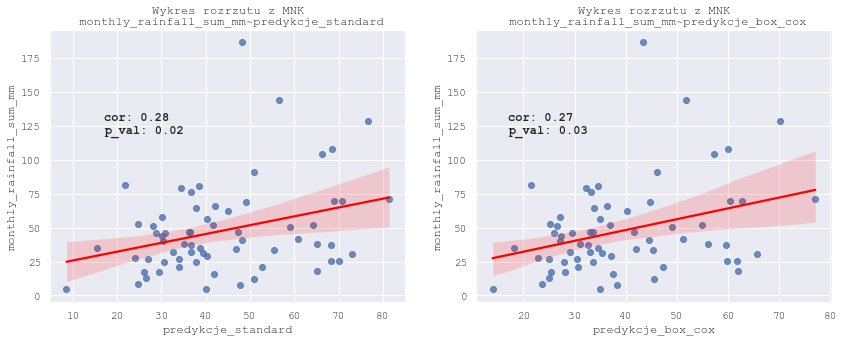

In [182]:
# zdefiniowanie predykcji modeli i złączenie ich w df
Y_pred = modelik.predict(X_test)
Y_pred_box = inv_boxcox(modelik_box.predict(X_test), lmbda)
dane_pred = pd.concat((Y_pred, Y_pred_box, Y_test), axis = 1)
dane_pred.rename({0:"predykcje_standard", 1:"predykcje_box_cox"}, axis = 1, inplace = True)

# ----- Wykresy -----
# korelacja spearmana i textbox dla predykcji standardowych
cor_standard = spearmanr(dane_pred["predykcje_standard"], dane_pred["monthly_rainfall_sum_mm"])
textbox_standard = "cor: {}\np_val: {}".format(round(cor_standard[0], 2), round(cor_standard[1], 2))

# korelacja spearmana i textbox dla predykcji box_cox
cor_box = spearmanr(dane_pred["predykcje_box_cox"], dane_pred["monthly_rainfall_sum_mm"])
textbox_box = "cor: {}\np_val: {}".format(round(cor_box[0], 2), round(cor_box[1], 2))


# zdefiniowanie figury
fig, ax = plt.subplots(nrows = 1, ncols=2,figsize = (14,5))
# predykcje standardowe
sns.regplot(x="predykcje_standard", y="monthly_rainfall_sum_mm", data = dane_pred, line_kws={"color": "red"}, ax = ax[0])
ax[0].set_title("Wykres rozrzutu z MNK\n monthly_rainfall_sum_mm~predykcje_standard")
ax[0].set_xlabel("predykcje_standard")
ax[0].set_ylabel("monthly_rainfall_sum_mm")
ax[0].text(17,120, textbox_standard,  weight="bold")
# predykcje box_cox
sns.regplot(x="predykcje_box_cox", y="monthly_rainfall_sum_mm", data = dane_pred, line_kws={"color": "red"}, ax = ax[1])
ax[1].set_title("Wykres rozrzutu z MNK\n monthly_rainfall_sum_mm~predykcje_box_cox")
ax[1].set_xlabel("predykcje_box_cox")
ax[1].set_ylabel("monthly_rainfall_sum_mm")
ax[1].text(17,120, textbox_box,  weight="bold")

plt.show()

In [183]:
display(get_metrices_pred(modelik,Y_test, X_test))
display(get_metrices_pred(modelik_box,Y_test, X_test, lmbda))

,mse,rmse,mae,mape
0,1033.988713,32.155695,23.101126,75.723234


,mse,rmse,mae,mape
0,1052.827042,32.447296,22.691419,69.064698


#### Plotowanie reszt obliczonych po odwróceniu transformacji boxa-coxa (to tylko z ciekawości - nie jest brane pod uwagę)

In [119]:
modelik_box_resid =  Y.iloc[:,0] - inv_boxcox(modelik_box.fittedvalues, lmbda)

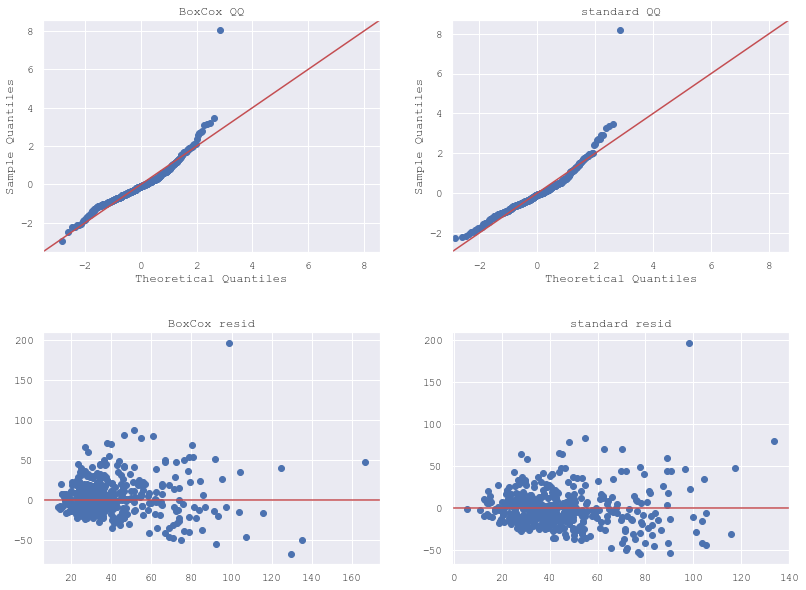

In [120]:
sns.set(font='Courier New')
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 9))

qqplot(modelik_box_resid, fit = True, line = "45", ax=ax[0,0])
ax[0,0].set_title("BoxCox QQ")

ax[1,0].scatter(inv_boxcox(modelik_box.fittedvalues, lmbda), modelik_box_resid)
ax[1,0].axhline(y=0, color='r', linestyle='-')
ax[1,0].set_title("BoxCox resid")

qqplot(modelik.resid, fit = True, line = "45", ax=ax[0,1])
ax[0,1].set_title("standard QQ")

ax[1,1].scatter(modelik.fittedvalues, modelik.resid)
ax[1,1].axhline(y=0, color='r', linestyle='-')
ax[1,1].set_title("standard resid")


fig.tight_layout(pad=3.0)

plt.show()

#### --------------------------------------------------------

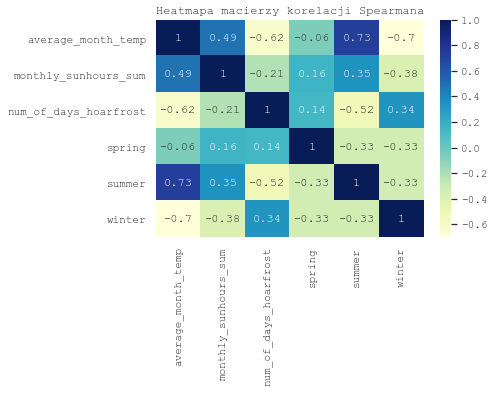

In [34]:
sns.heatmap(korelacja, cmap="YlGnBu", annot=True, cbar=True)
plt.title('Heatmapa macierzy korelacji Spearmana')
plt.show()

#### Notatki:
- **Suwałki** nie mają zer w nasłonecznieniu -> box cox daje dużo w teście whitea, wyższe $R^2$ mae i mape niższe, mse i rmse niższe, JB i RM odrzucają H0 o normalności,
- **Suwałki** jeżeli wywalimy wszystkie sezony, to vify okej, metryki lepsze, $R^2$ niższe o 0.05 na boxie, 0.06 na norm, box dużo pomaga w White, JB, RM, ale nie przyjmuje H0,
- **Suwałki** zmienne z wiatrem są silnie istotne pojedynczo (10 m/s, 15 m/s, storm - to ostatnie najbardziej),
- test BP jest zrozumiały - można stosować,

In [65]:
#pd.concat((Y,X), axis = 1).to_csv("WARSZAWA.csv", sep = ";")

In [37]:
#data.to_csv("dane_finalne.csv", sep = ";", index=False)